In [2]:
%matplotlib inline


# Ejercicio de Manifold Learning: Proyecto Aceite de Oliva

### Aprendizaje máquina II (Curso 2023-2024)


### Nombre y apellidos: 

## 1.- Carga de datos.

Carga el conjunto de datos **olive.csv**. Este conjunto de datos clasifica diferentes tipos de aceites de oliva italianos en regiones (3 grupos) y áreas (9 grupos) en función de su composición. Separa el conjunto de datos en *X*, *y3* y *y9*.

In [3]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.subplots as tls
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from pandas import read_csv 
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


In [4]:
path_olives = './data/olive.csv'
dataframe = pd.read_csv(path_olives)
dataframe.head(7)

class  Region  Area  palmitic  palmitoleic  stearic  oleic  \
0  North-Apulia       1     1       952           49      254   7795   
1  North-Apulia       1     1      1036           59      235   7868   
2  North-Apulia       1     1      1075           75      226   7823   
3  North-Apulia       1     1       995           46      288   7806   
4  North-Apulia       1     1      1155           98      201   7606   
5  North-Apulia       1     1       922           66      264   7990   
6      Calabria       1     2      1296          136      260   7380   

   linoleic  linolenic  arachidic  eicosenoic  
0       780         50         75          41  
1       661         30         62          44  
2       672         36         60          29  
3       679         56         86          40  
4       816         32         60          29  
5       618         49         56          29  
6       780         48         51          18

In [5]:
'''
Dividimos los datos en tres grupos. Uno con las propiedades de los
aceites, otro con la región de procedencia y otro con el área de
procedencia.
'''

X   = dataframe.drop(['class', 'Region', 'Area'], axis = 1)
y3  = dataframe['Region']
y3_categories =[str(i) for i in y3]
y9  = dataframe['Area']
y9_categories =[str(i) for i in y9]

In [6]:
print("Dimensiones de X: ", X.shape)
print("Dimensiones de y3:", y3.shape)
print("Dimensiones de y9:", y9.shape)

Dimensiones de X:  (572, 8)
Dimensiones de y3: (572,)
Dimensiones de y9: (572,)


## 2.- Visualización de los datos.

- Utilizando los algoritmos t-SNE y UMAP vistos en clase, realiza una visualización de los datos en 2D y en 3D (utiliza la librería plotly para la representación 3D) coloreando los puntos con `labels3` y `labels9`. En UMAP, utiliza la versión no supervisada.
- Varía los parámetros de perplexity y n_neighbors según consideres y comenta qué valores has escogido y porqué.
- Comenta los gráficos y compara los resultados en función del valor de KL obtenido (en t-SNE). 


### 2.1 Visualización 2D y 3D de los datos con t-SNE y UMAP

In [7]:
# si n_jobs= 1 se desactiva el paralelismo
# si n_jobs=-1 se activa el paralelismo
# activar el paralelismo rompe el determinismo de random state de UMAP
umap_instance = umap.UMAP(n_jobs= 1)
# umap_instance = umap.UMAP(n_jobs=-1)

#TSNE
tsne_2d  = TSNE(n_components=2,     # 2D embedding
                random_state=42, 
                perplexity=30,    
                metric="euclidean",
                verbose=True       # no output
                )      

X_tsne_2d = tsne_2d.fit_transform(X)


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.000s...
[t-SNE] Computed neighbors for 572 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 62.042635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.264114
[t-SNE] KL divergence after 1000 iterations: 0.311541


In [8]:

#UMAP
umap_2d = umap.UMAP(n_components=2,  # 2D embedding
                    random_state=42,
                    n_neighbors=10,
                    verbose=True   # no output
                    )

X_umap_2d = umap_2d.fit_transform(X)


UMAP(n_neighbors=10, random_state=42, verbose=True)
Sat Mar  9 19:20:52 2024 Construct fuzzy simplicial set


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Sat Mar  9 19:20:52 2024 Finding Nearest Neighbors
Sat Mar  9 19:20:54 2024 Finished Nearest Neighbor Search
Sat Mar  9 19:20:56 2024 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar  9 19:20:57 2024 Finished embedding


In [9]:
tsne_2d_df = pd.DataFrame(X_tsne_2d, columns=['Característica 1', 'Característica 2'])
umap_2d_df = pd.DataFrame(X_umap_2d, columns=['Característica 1', 'Característica 2'])

A partir de nuestras variables descriptivas (las primeras 8 almacenadas en X) reconstruimos nuestros datos con TSNE y UMAP. Hameos mapeados bidimensionales para poder representar los datos. Podríamos también aumentar el número de componentes y limitarnos a representar 2 o 3 de ellas.

In [10]:
tsne_2d_df['Región'] = y3_categories
tsne_2d_df['Área']   = y9_categories
tsne_2d_df

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne = px.scatter(tsne_2d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      color= 'Región', 
                      symbol= 'Área',
                      title='Visualización T-SNE en 2D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_tsne.update_layout(
    autosize=True, 
    width=700, 
    height=500,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_tsne.show()

In [11]:
%%capture
# Representación alternativa no interaccionable
'''
tsne_2d_df['Región'] = y3_categories
tsne_2d_df['Área']   = y9_categories

sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font='sans-serif',
              font_scale=1,
              color_codes=True)

# Crear un gráfico de dispersión con Seaborn
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=tsne_2d_df, x='Característica 1', y='Característica 2', hue='Región', style='Área')

# Cambiar el título de la leyenda
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles=handles[1:], labels=labels[1:], title="Región")
scatter.set_title('Visualización t-SNE en 2D')
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.1)

# Mostrar el gráfico
plt.show()

'''

In [12]:
umap_2d_df['Región'] = y3_categories
umap_2d_df['Área']   = y9_categories
umap_2d_df

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_umap = px.scatter(umap_2d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      color= 'Región', 
                      symbol= 'Área',
                      title='Visualización UMAP en 2D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_umap.update_layout(
    autosize=True, 
    width=700, 
    height=500,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_umap.show()

Podemos representar los datos transformados por UMSP y T-SNE en 2 plots cada uno, de forma que separemos región y área en gráficos distintos:

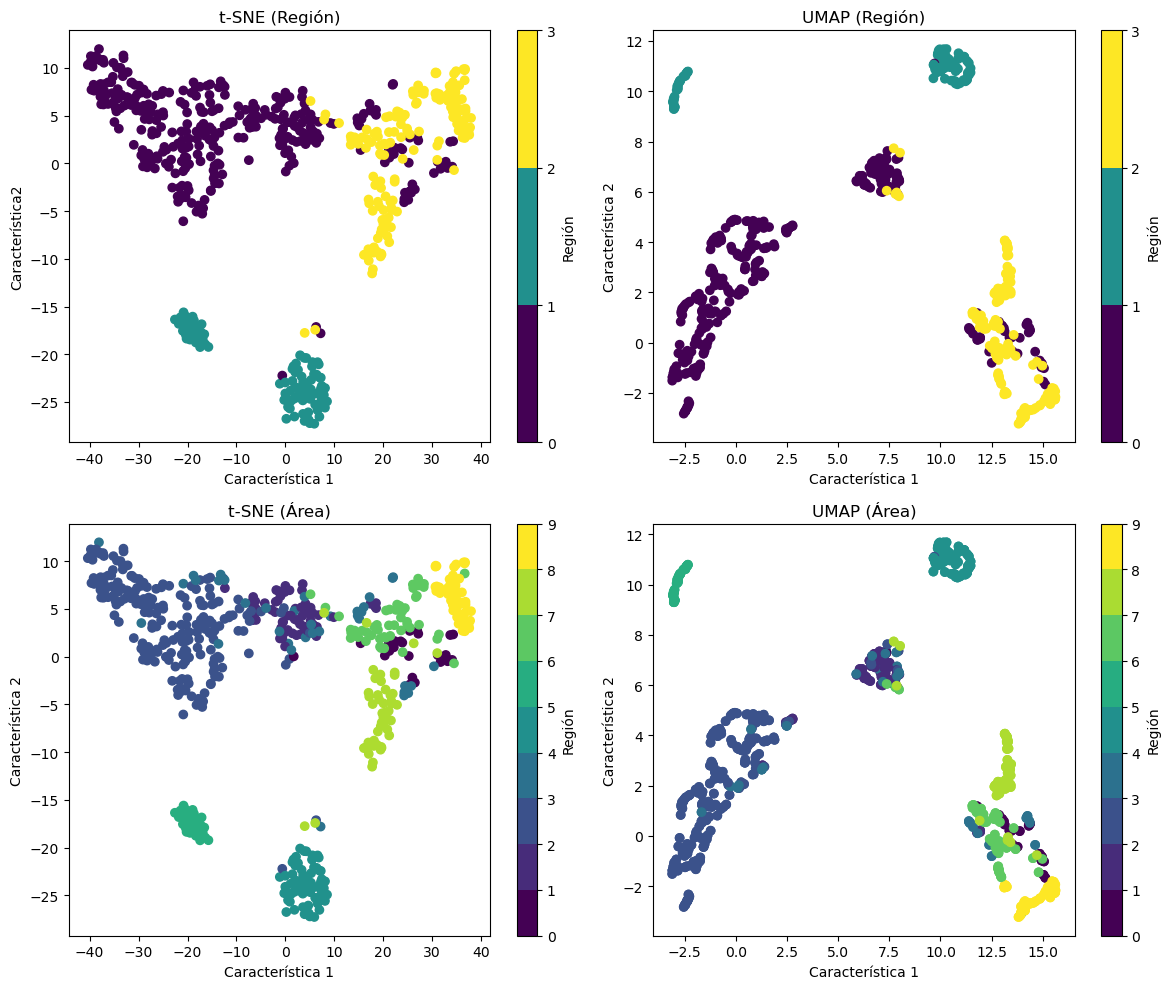

In [13]:
# Crear una figura con 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

cmap = plt.get_cmap('viridis')

bounds_reg = [0, 1, 2, 3]
bounds_are = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

norm_reg = mcolors.BoundaryNorm(bounds_reg, cmap.N)
norm_are = mcolors.BoundaryNorm(bounds_are, cmap.N)

# Scatter plot de t-SNE con y3
axs[0, 0].scatter(tsne_2d_df['Característica 1'], tsne_2d_df['Característica 2'], c=y3, cmap='viridis')
axs[0, 0].set_title('t-SNE (Región)')
axs[0, 0].set_xlabel('Característica 1')
axs[0, 0].set_ylabel('Característica2')
scat_t_reg = axs[0, 0].scatter([], [], c=[], cmap='viridis', norm=norm_reg)
fig.colorbar(scat_t_reg, ax=axs[0, 0], label='Región', ticks=bounds_reg)

# Scatter plot de UMAP con y3
axs[0, 1].scatter(umap_2d_df['Característica 1'], umap_2d_df['Característica 2'], c=y3, cmap='viridis')
axs[0, 1].set_title('UMAP (Región)')
axs[0, 1].set_xlabel('Característica 1')
axs[0, 1].set_ylabel('Característica 2')
scat_t_reg = axs[0, 1].scatter([], [], c=[], cmap='viridis', norm=norm_reg)
fig.colorbar(scat_t_reg, ax=axs[0, 1], label='Región', ticks=bounds_reg)

# Scatter plot de t-SNE con y9
axs[1, 0].scatter(tsne_2d_df['Característica 1'], tsne_2d_df['Característica 2'], c=y9, cmap='viridis')
axs[1, 0].set_title('t-SNE (Área)')
axs[1, 0].set_xlabel('Característica 1')
axs[1, 0].set_ylabel('Característica 2')
scat_t_are = axs[1, 0].scatter([], [], c=[], cmap='viridis', norm=norm_are)
fig.colorbar(scat_t_are, ax=axs[1, 0], label='Región', ticks=bounds_are)

# Scatter plot de UMAP con y9
axs[1, 1].scatter(umap_2d_df['Característica 1'], umap_2d_df['Característica 2'], c=y9, cmap='viridis')
axs[1, 1].scatter(X_umap_2d[:,0], X_umap_2d[:,1], c=y9, cmap='viridis')
axs[1, 1].set_title('UMAP (Área)')
axs[1, 1].set_xlabel('Característica 1')
axs[1, 1].set_ylabel('Característica 2')
scat_t_are = axs[1, 1].scatter([], [], c=[], cmap='viridis', norm=norm_are)
fig.colorbar(scat_t_are, ax=axs[1, 1], label='Región', ticks=bounds_are)

plt.tight_layout()
plt.show()

Paral la etiqueta `Region`, tanto t-SNE como UMAP, son capaces de separar relativamente bien en clusters los distintos tipos de aceite, con solo unas pocas muestras solapadas. Tal vez seamos capaces de separarlas mejor aplicando los mismos algoritmos con `n_components = 3`. El modelo `UMAP` es capaz de agrupar los datos de forma menos dispersa (concentra más las clases en cada cluster).

Para la etiqueta `Area`, las salidas son similares. Los distintos tipos de aceite según el área no están siendo separados correctamente y el solape es bastante alto.

**Representación 3D:**



Esta vez no solo `n_components=3`, si no que además hemos aumentado el valor de perplexity, que controla el número de vecinos que se consideran al construir la estructura de vecindad durante el proceso de optimización. Un valor típico de perplexity suele estar entre 5 y 75. Cuanto mayor sea el valor de perplexity, más vecinos se considerarán en el cálculo de la probabilidad condicional entre los puntos de datos. Un valor alto de perplexity puede conducir a estructuras de incrustación global más significativas, pero también puede aumentar el tiempo de cómputo y la complejidad del algoritmo. Los resultados que obtuvimos en el remapeado 2D con `perplexity=30` eran mejorables cuando se coloreaba según el Área. Hemos duplicado el valor, con el correspondiente coste computacional y no hemos obtenido mejoras aparentes. Por otro lado hemos considerado el doble de vecinos (`n_neighbors=20`) para UMAP (por el mismo motivo) y la representación según el área tampoco mejora. Es posible que no haya más relación subyaciente en el área más que la región a la que pertenecen, que si es fácilmente distinguible.

A continuación, los resultados:

In [14]:
#TSNE
tsne_3d  = TSNE(n_components=3,     # 3D embedding
                random_state=42, 
                perplexity=60,    
                metric="euclidean",
                verbose=True       # no output
                )      

X_tsne_3d = tsne_3d.fit_transform(X)

[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 572 samples in 0.000s...
[t-SNE] Computed neighbors for 572 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 572 / 572
[t-SNE] Mean sigma: 108.023545
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.510635
[t-SNE] KL divergence after 1000 iterations: 0.160491


In [15]:
#UMAP
umap_3d = umap.UMAP(n_components=3,  # 3D embedding
                    random_state=42,
                    n_neighbors=20,
                    verbose=True   # no output
                    )

X_umap_3d = umap_3d.fit_transform(X)

UMAP(n_components=3, n_neighbors=20, random_state=42, verbose=True)
Sat Mar  9 19:21:01 2024 Construct fuzzy simplicial set
Sat Mar  9 19:21:02 2024 Finding Nearest Neighbors
Sat Mar  9 19:21:02 2024 Finished Nearest Neighbor Search
Sat Mar  9 19:21:02 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar  9 19:21:03 2024 Finished embedding


In [16]:
tsne_3d_df = pd.DataFrame(X_tsne_3d, columns=['Característica 1', 'Característica 2', 'Característica 3'])
umap_3d_df = pd.DataFrame(X_umap_3d, columns=['Característica 1', 'Característica 2', 'Característica 3'])

In [17]:
tsne_3d_df['Región'] = y3_categories
tsne_3d_df['Área']   = y9_categories
tsne_3d_df['size']   = 10  # tamaño de los puntos

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_tsne_3d = px.scatter_3d(tsne_3d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      z='Característica 3',
                      color= 'Región', 
                      symbol= 'Área',
                      size='size',  # Usar la nueva columna 'size' para determinar el tamaño de los puntos
                      title='Visualización T-SNE en 3D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_tsne_3d.update_layout(
    autosize=True, 
    width=850, 
    height=850,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_tsne_3d.show()

In [18]:
umap_3d_df['Región'] = y3_categories
umap_3d_df['Área']   = y9_categories
umap_3d_df['size']   = 10  # tamaño de los puntos

# Crear un gráfico interactivo con Plotly para t-SNE con y3 y y9
fig_umap_3d = px.scatter_3d(umap_3d_df, 
                      x='Característica 1', 
                      y='Característica 2', 
                      z='Característica 3',
                      color= 'Región', 
                      symbol= 'Área',
                      size='size',  # Usar la nueva columna 'size' para determinar el tamaño de los puntos
                      title='Visualización UMAP en 3D',
                      color_discrete_sequence=px.colors.qualitative.Plotly)

fig_umap_3d.update_layout(
    autosize=True, 
    width=850, 
    height=750,
    legend=dict(
        yanchor="top", y=1,
        xanchor="left", x=1.2
    )
)

# Mostrar el gráfico interactivo
fig_umap_3d.show()

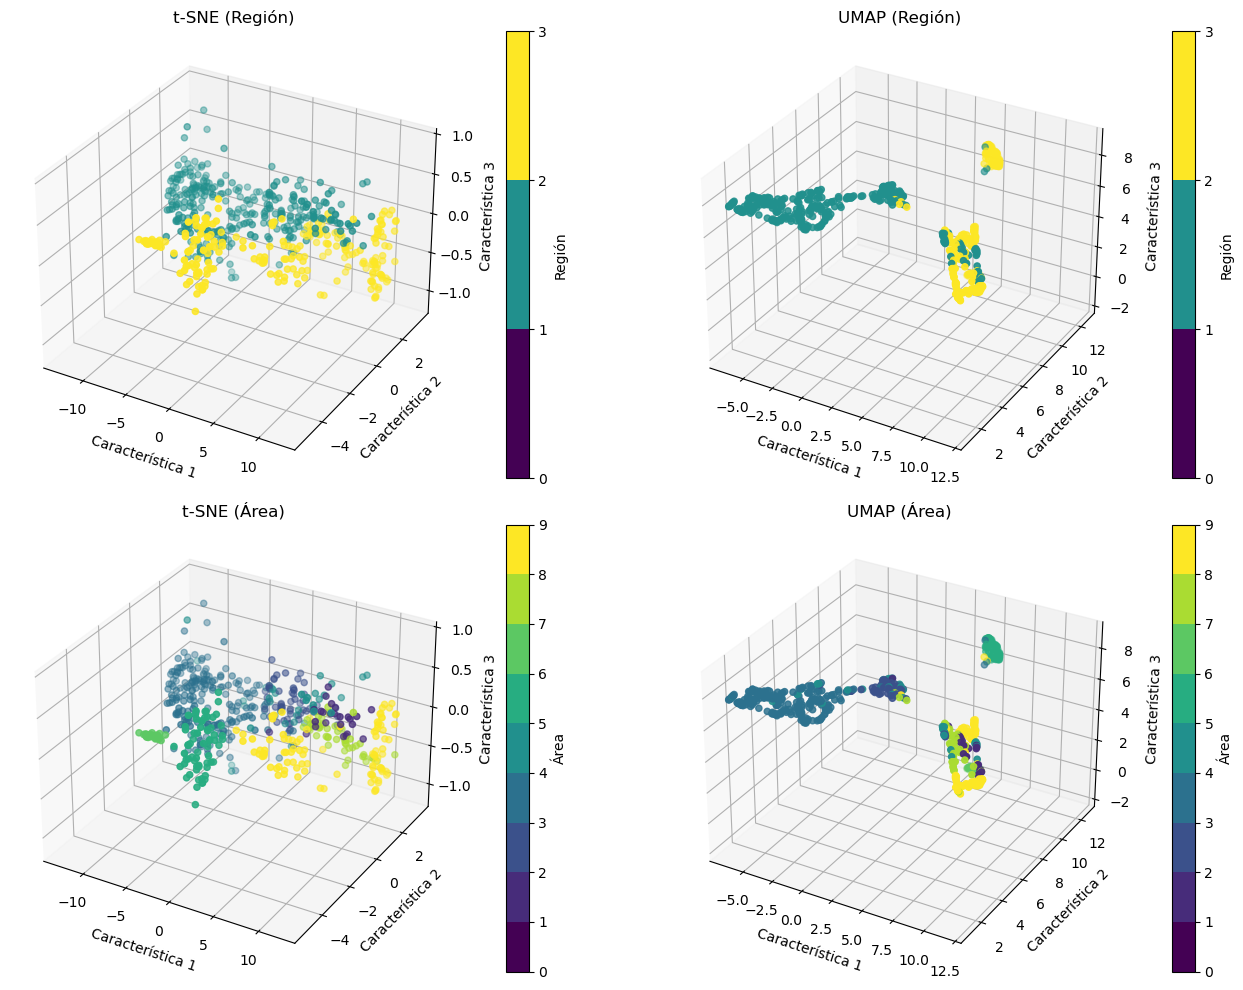

In [19]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura con 4 subplots
fig = plt.figure(figsize=(14, 10))

cmap = plt.get_cmap('viridis')

bounds_reg = [0, 1, 2, 3]
bounds_are = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

norm_reg = mcolors.BoundaryNorm(bounds_reg, cmap.N)
norm_are = mcolors.BoundaryNorm(bounds_are, cmap.N)

# Scatter plot 3D de t-SNE con y3
ax = fig.add_subplot(2, 2, 1, projection='3d')
scat_t_reg = ax.scatter(tsne_3d_df['Característica 1'], tsne_3d_df['Característica 2'], tsne_3d_df['Característica 3'], c=y3, cmap='viridis', norm=norm_reg)
ax.set_title('t-SNE (Región)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_t_reg, ax=ax, label='Región', ticks=bounds_reg, pad=0.07)

# Scatter plot 3D de UMAP con y3 
ax = fig.add_subplot(2, 2, 2, projection='3d')
scat_u_reg = ax.scatter(umap_3d_df['Característica 1'], umap_3d_df['Característica 2'], umap_3d_df['Característica 3'], c=y3, cmap='viridis', norm=norm_reg)
ax.set_title('UMAP (Región)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_u_reg, ax=ax, label='Región', ticks=bounds_reg, pad=0.07)

# Scatter plot 3D de t-SNE con y9
ax = fig.add_subplot(2, 2, 3, projection='3d')
scat_t_are = ax.scatter(tsne_3d_df['Característica 1'], tsne_3d_df['Característica 2'], tsne_3d_df['Característica 3'], c=y9, cmap='viridis', norm=norm_are)
ax.set_title('t-SNE (Área)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_t_are, ax=ax, label='Área', ticks=bounds_are, pad=0.07)

# Scatter plot 3D de UMAP con y9
ax = fig.add_subplot(2, 2, 4, projection='3d')
scat_u_are = ax.scatter(umap_3d_df['Característica 1'], umap_3d_df['Característica 2'], umap_3d_df['Característica 3'], c=y9, cmap='viridis', norm=norm_are)
ax.set_title('UMAP (Área)')
ax.set_xlabel('Característica 1')
ax.set_ylabel('Característica 2')
ax.set_zlabel('Característica 3')
fig.colorbar(scat_u_are, ax=ax, label='Área', ticks=bounds_are, pad=0.07)

plt.tight_layout()
plt.show()

### 2.2 Variación en los valores de `perplexity` y `n_neighbours`



#### **Perplexity**

En primer lugar, sobre el modelo `t-SNE` se varía el valor de `perplexity` de 5 a 105 variando de 5 en 5, con el fin de ver como afecta este parámetro a los resultados. Probamos con `n_components=2` y `n_components_3`. Aunque normalmente nos centraríamos en los valores de perplexity $\in (5,50)$, iremos un poco más hallá para ver si hay algún comportamiento asintótico.

In [20]:
from openTSNE import TSNE as openTSNE

In [21]:
lista_perplexity_2d = range(5, 106, 5)

for p in lista_perplexity_2d:
    tsne_barrido = openTSNE(perplexity=p, 
                        n_components=2, 
                        metric="euclidean",
                        random_state=42,
                        verbose=True       
                        ) 

    %time TSNE_2d_barrido = tsne_barrido.fit(X)
    

--------------------------------------------------------------------------------
TSNE(perplexity=5, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 15 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 3.7777, 50 iterations in 0.0577 sec
Iteration  100, KL divergence 3.0125, 50 iterations in 0.0474 sec
Iteration  150, KL divergence 2.7981, 50 iterations in 0.0456 sec
Iteration  200, KL divergence 2.6986, 50 iterations in 0.0458 sec
Iteration  250, KL divergence 2.6386, 50 iterations in 0.0469 sec
   --> Time elapsed: 0.24 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 for 500 iteration

In [22]:

kl_div_2d = {
    'Perplexity': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105],
    'KL_Divergence': [0.5041, 0.4508, 0.4040, 0.3656, 0.3359, 0.3124, 0.2934, 0.2789, 0.2605, 0.2482, 
    0.2386, 0.2298, 0.2220, 0.2146, 0.2146, 0.2091, 0.2090, 0.2091, 0.2117, 0.1711, 0.1653],
    'Time': [0.51, 0.52, 0.54, 0.54, 0.56, 0.57, 0.59, 0.61, 0.63, 0.65, 0.68, 0.70, 0.72, 0.75, 0.75, 0.79, 0.83, 0.85, 0.87, 0.90, 0.93]
}

# Crear el DataFrame
df_2dkl = pd.DataFrame(kl_div_2d)

# Mostrar el DataFrame
print(df_2dkl)

    Perplexity  KL_Divergence  Time
0            5         0.5041  0.51
1           10         0.4508  0.52
2           15         0.4040  0.54
3           20         0.3656  0.54
4           25         0.3359  0.56
5           30         0.3124  0.57
6           35         0.2934  0.59
7           40         0.2789  0.61
8           45         0.2605  0.63
9           50         0.2482  0.65
10          55         0.2386  0.68
11          60         0.2298  0.70
12          65         0.2220  0.72
13          70         0.2146  0.75
14          75         0.2146  0.75
15          80         0.2091  0.79
16          85         0.2090  0.83
17          90         0.2091  0.85
18          95         0.2117  0.87
19         100         0.1711  0.90
20         105         0.1653  0.93


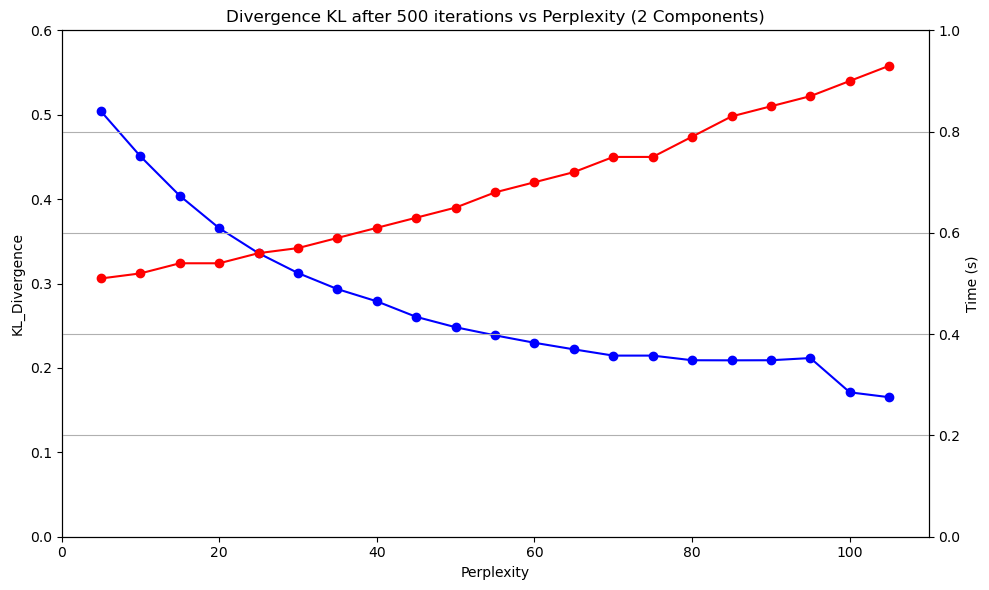

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KL Divergence
ax1.plot(df_2dkl["Perplexity"], df_2dkl["KL_Divergence"], marker='o', color='blue', linestyle='-')
ax1.set_xlabel('Perplexity')
ax1.set_ylabel('KL_Divergence')
ax1.set_ylim(0, 0.6)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_2dkl["Perplexity"], df_2dkl["Time"], marker='o', color='red', linestyle='-')
ax2.set_ylabel('Time (s)')
ax2.set_ylim(0, 1.0)

# Add labels and title
plt.title('Divergence KL after 500 iterations vs Perplexity (2 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
lista_perplexity_3d = range(5, 106, 5)

for p in lista_perplexity_3d:
    tsne_barrido = openTSNE(perplexity=p, 
                        n_components=3, 
                        metric="euclidean",
                        random_state=42,
                        verbose=True       
                        ) 

    %time TSNE_3d_barrido = tsne_barrido.fit(X)

--------------------------------------------------------------------------------
TSNE(n_components=3, perplexity=5, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 15 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.00 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.00 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=200.00 for 250 iterations...
Iteration   50, KL divergence 3.7385, 50 iterations in 0.0871 sec
Iteration  100, KL divergence 2.9487, 50 iterations in 0.0698 sec
Iteration  150, KL divergence 2.7537, 50 iterations in 0.0735 sec
Iteration  200, KL divergence 2.6642, 50 iterations in 0.0727 sec
Iteration  250, KL divergence 2.6124, 50 iterations in 0.0685 sec
   --> Time elapsed: 0.37 seconds
===> Running optimization with exaggeration=1.00, lr=200.00 f

In [25]:
kl_div_3d = {
    'Perplexity': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105],
    'KL_Divergence': [2.6124, 0.4921, 0.3991, 0.3537, 0.3228, 0.2989, 0.2790, 0.2633, 0.2488, 0.2379, 
    0.2289, 0.2207, 0.2140, 0.2094, 0.1997, 0.1929, 0.1859, 0.1793, 0.1728, 0.1668, 0.1616],
    'Time': [0.74, 0.74, 0.77, 0.79, 0.81, 0.88, 0.82, 0.91, 0.94, 0.94, 0.99, 1.02, 1.06, 1.02, 
    1.05, 1.21, 1.17, 1.20, 1.29, 1.30, 1.25]
}

# Crear el DataFrame
df_3dkl = pd.DataFrame(kl_div_3d)

# Mostrar el DataFrame
print(df_3dkl)

    Perplexity  KL_Divergence  Time
0            5         2.6124  0.74
1           10         0.4921  0.74
2           15         0.3991  0.77
3           20         0.3537  0.79
4           25         0.3228  0.81
5           30         0.2989  0.88
6           35         0.2790  0.82
7           40         0.2633  0.91
8           45         0.2488  0.94
9           50         0.2379  0.94
10          55         0.2289  0.99
11          60         0.2207  1.02
12          65         0.2140  1.06
13          70         0.2094  1.02
14          75         0.1997  1.05
15          80         0.1929  1.21
16          85         0.1859  1.17
17          90         0.1793  1.20
18          95         0.1728  1.29
19         100         0.1668  1.30
20         105         0.1616  1.25


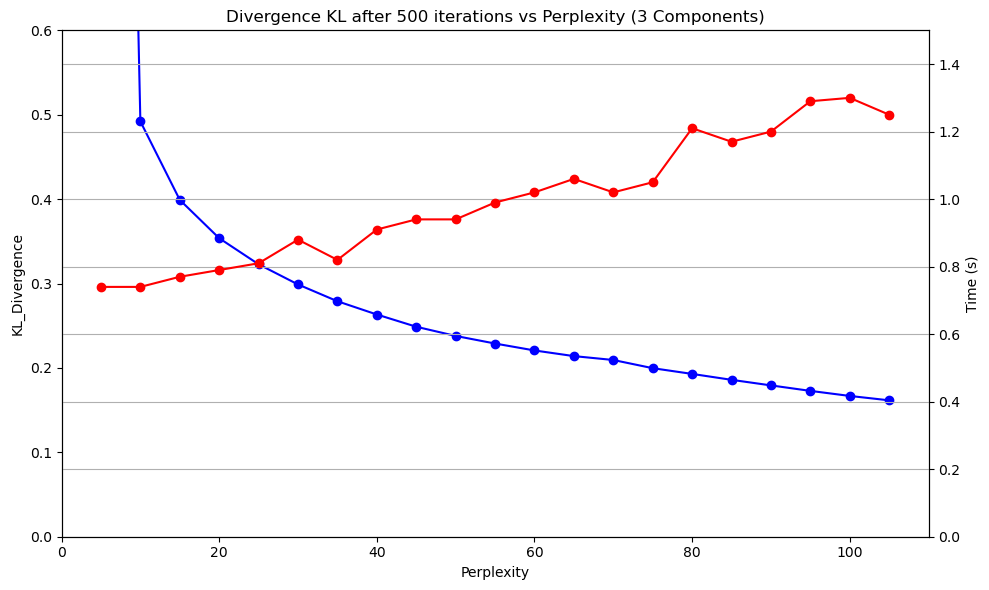

In [26]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot KL Divergence
ax1.plot(df_3dkl["Perplexity"], df_3dkl["KL_Divergence"], marker='o', color='blue', linestyle='-')
ax1.set_xlabel('Perplexity')
ax1.set_ylabel('KL_Divergence')
ax1.set_ylim(0, 0.6)

# Create a second y-axis
ax2 = ax1.twinx()
ax2.plot(df_3dkl["Perplexity"], df_3dkl["Time"], marker='o', color='red', linestyle='-')
ax2.set_ylabel('Time (s)')
ax2.set_ylim(0, 1.5)

# Add labels and title
plt.title('Divergence KL after 500 iterations vs Perplexity (3 Components)')
plt.grid(True)
plt.tight_layout()
plt.show()



Si lo representamos de forma conjunta:

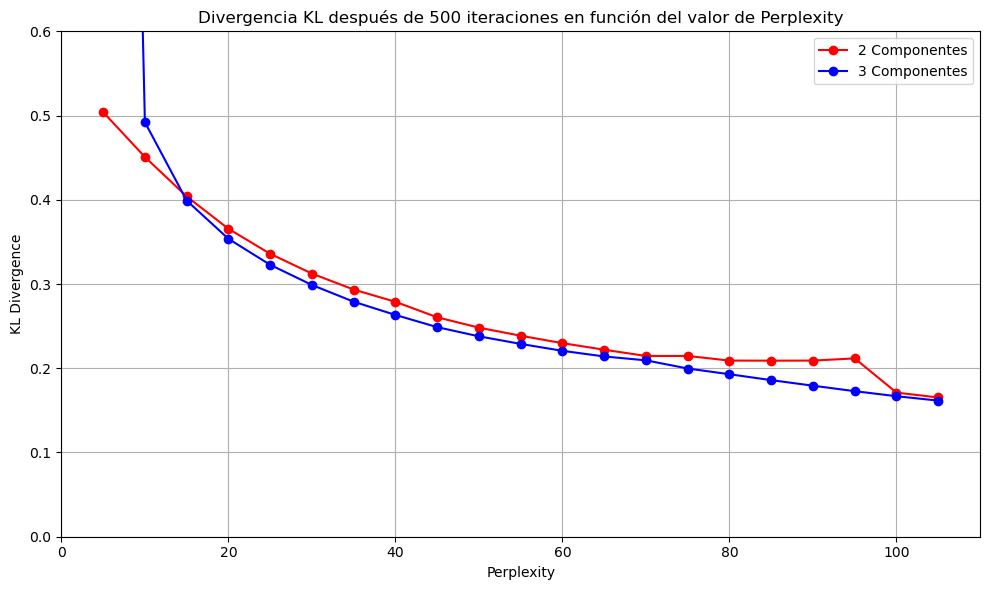

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot de 2 Componentes
plt.plot(df_2dkl["Perplexity"], df_2dkl["KL_Divergence"], marker='o', color='red', linestyle='-', label='2 Componentes')

# Plot de 3 Componentes
plt.plot(df_3dkl["Perplexity"], df_3dkl["KL_Divergence"], marker='o', color='blue', linestyle='-', label='3 Componentes')

# Añadir etiquetas y título
plt.title('Divergencia KL después de 500 iteraciones en función del valor de Perplexity')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
ax.set_ylim(0, 0.6)
plt.grid(True)
plt.legend()  # Mostrar leyenda con etiquetas de los componentes

# Mostrar la gráfica combinada
plt.tight_layout()
plt.show()

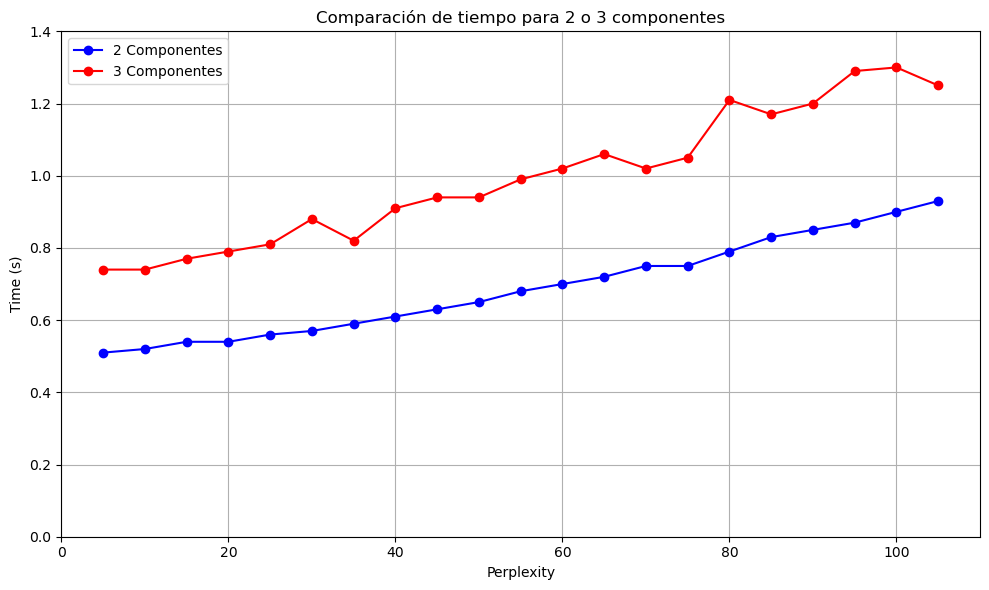

In [28]:

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))

# Plot for 2 components
ax.plot(df_2dkl["Perplexity"], df_2dkl["Time"], marker='o', color='blue', linestyle='-', label='2 Componentes')

# Plot for 3 components
ax.plot(df_3dkl["Perplexity"], df_3dkl["Time"], marker='o', color='red', linestyle='-', label='3 Componentes')

# Set labels and title
ax.set_xlabel('Perplexity')
ax.set_ylabel('Time (s)')
ax.set_ylim(0, 1.4)  # Adjust the y-axis limit if needed
ax.legend()

# Add title and grid
plt.title('Comparación de tiempo para 2 o 3 componentes')
plt.grid(True)
plt.tight_layout()
plt.show()

En la implementación de t-SNE con 3 dimensiones, se observa un comportamiento similar al de 2 dimensiones: a medida que aumenta el valor de la `perplexity`, disminuye el valor de la `Kullback-Leibler` (KL). La `perplexity` es un parámetro que determina el número de vecinos a considerar en los cálculos, y está vinculado con la amplitud de la distribución gaussiana utilizada; por lo tanto, a valores más altos de `perplexity`, se consideran más vecinos.

Normalmente, la `perplexity` se sitúa alrededor de 30, aunque puede variar dependiendo del caso, sin superar nunca el número total de puntos en el dataset. Como tenemos 573 muestras (con 8 características), esta última restricción no es roblema. REcordemos que la divergencia KL mide la similitud entre dos distribuciones de probabilidad: la de los datos originales y la de los datos en el espacio transformado. Por lo tanto, se busca minimizar la KL para maximizar la afinidad entre las distribuciones.

La librería exige no paralelizar TSNE para que los datos sean reproducibles indicando el `random state`. Ello nos limita a un núcleo. Los tiempos de cálculo oscilan entre `0.5 s` para `perplexity=5` con 2 componentes y `1.25 s` para `perplexity=105` con 3 componentes (aproximadamente). El tiempo necesario crece de forma aproximadamente lineal con el número de perplexity.

#### **Neighbours**

A continuación, variamos `n_neighbors` desde 2 hasta 20 (no incluido), yendo de 2 en 2, con el fin de comprobar que efecto tiene el número de vecinos en los resultados que proporciona el modelo `UMAP.` La forma más sencilla de evaluar el método es visualizar los datos, aunque podríamos hacer uso del test de información mutua (ver notebook de UMAP). Por tanto, para cada número de vecinos probado se realizará un gráfico con el fin de ver los clusters o agrupaciones de los datos.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



CPU times: total: 1.39 s
Wall time: 1.69 s
CPU times: total: 469 ms
Wall time: 1.6 s
CPU times: total: 656 ms
Wall time: 1.48 s
CPU times: total: 875 ms
Wall time: 1.52 s
CPU times: total: 1.16 s
Wall time: 1.63 s
CPU times: total: 750 ms
Wall time: 1.88 s
CPU times: total: 531 ms
Wall time: 1.65 s
CPU times: total: 1.09 s
Wall time: 1.62 s
CPU times: total: 938 ms
Wall time: 1.62 s


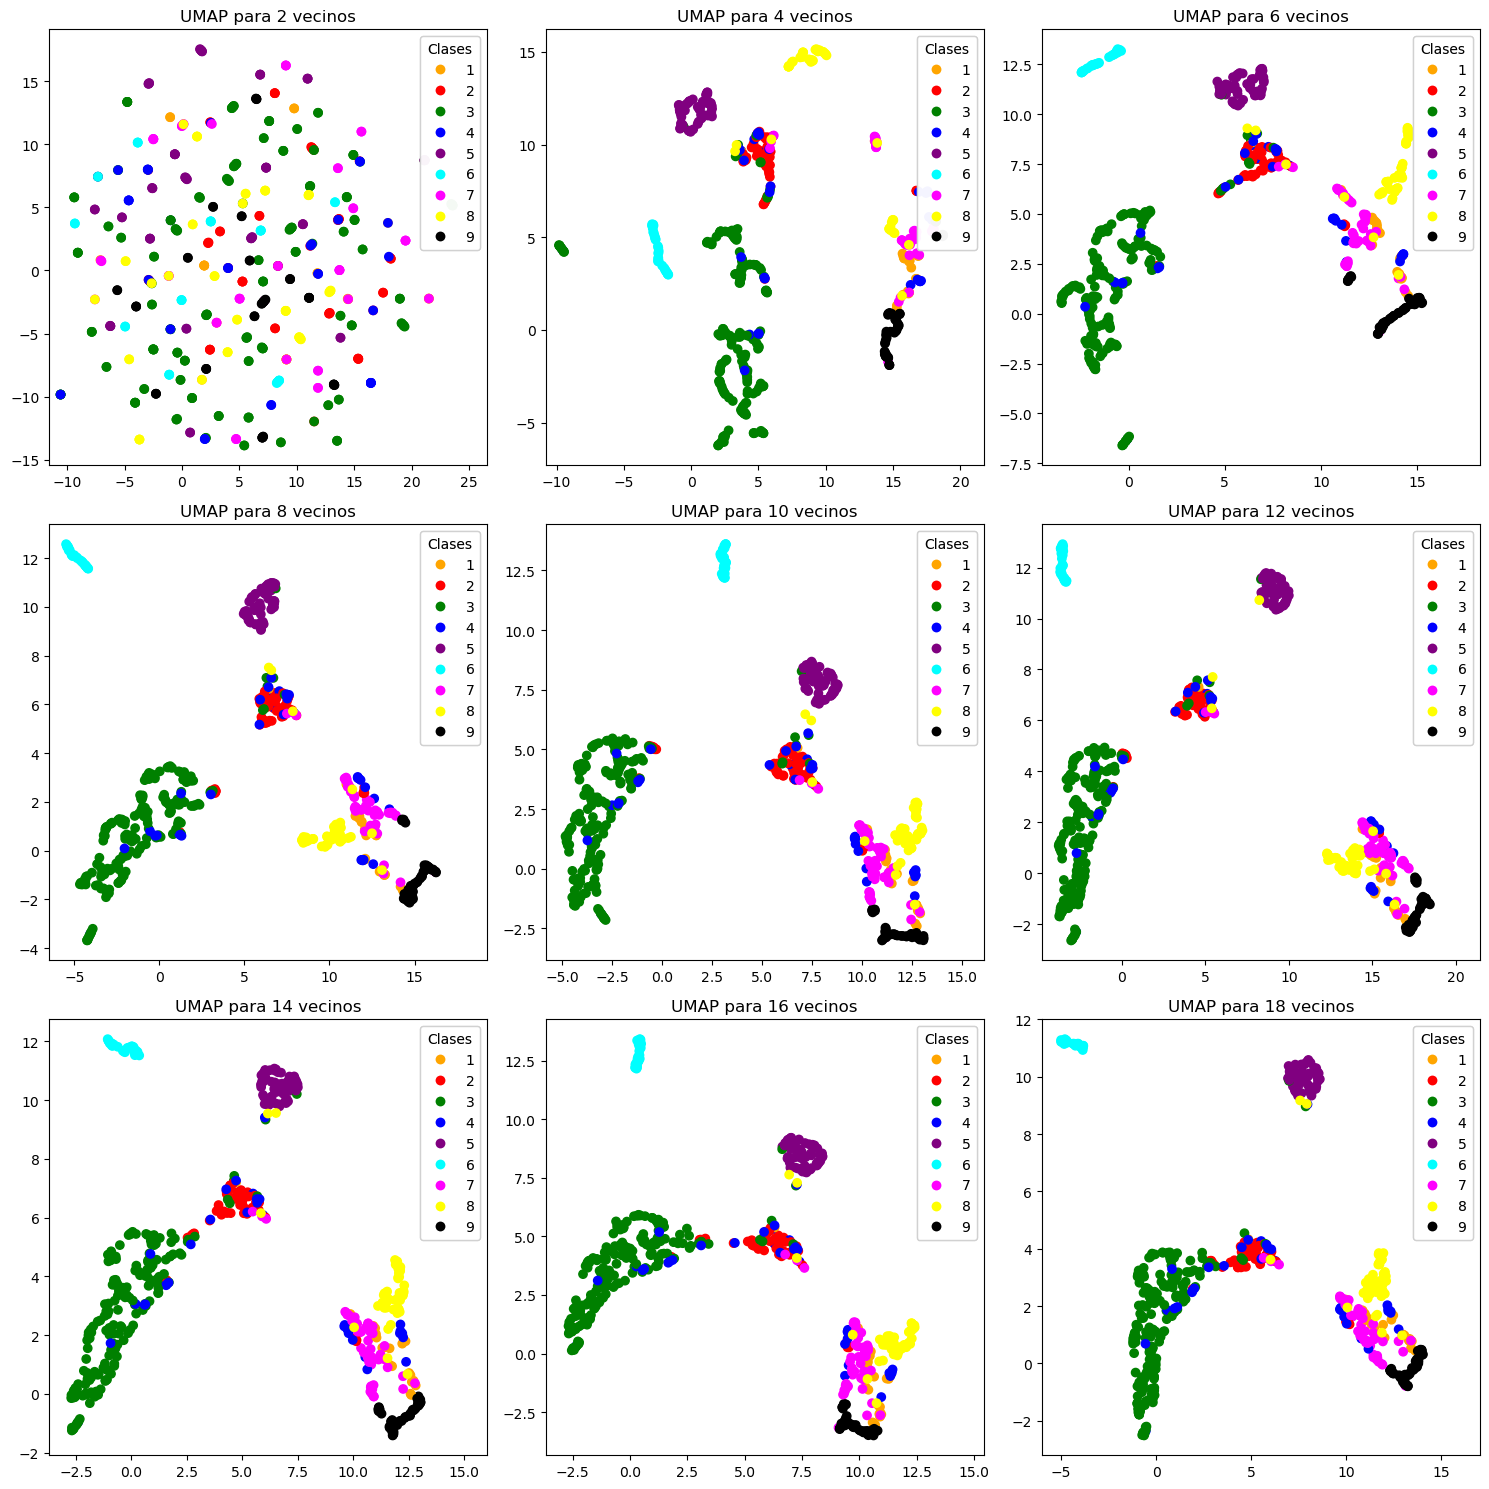

In [29]:
## Barrido de vecinos para UMAP: 2 Componentes


# Definir un colormap discreto con 9 colores
cmap = ListedColormap(["orange", "red", "green", "blue", "purple", "cyan", "magenta", "yellow", "black"])

vecinos = range(2, 20, 2)
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, v in enumerate(vecinos):
    row = i // 3
    col = i % 3
    
    %time embeddingUMAP2d = umap.UMAP(n_neighbors=v, n_components=2).fit_transform(X)
    
    # Scatter plot usando Matplotlib
    scatter = axes[row, col].scatter(embeddingUMAP2d[:, 0], embeddingUMAP2d[:, 1], c=list(y9), cmap=cmap)
    axes[row, col].set_title('UMAP para {} vecinos'.format(v))
    
    # Agregar la leyenda de colores
    legend1 = axes[row, col].legend(*scatter.legend_elements(), title="Clases", loc="upper right")
    axes[row, col].add_artist(legend1)

    
    # Aumentar los límites del eje horizontal
    axes[row, col].set_xlim(embeddingUMAP2d[:, 0].min() - 1, embeddingUMAP2d[:, 0].max() + 3)



plt.tight_layout()
plt.show()

Se puede observar que cuando se consideran solo 2 vecinos, el agrupamiento es incoherente. Los datos no forman clusters distintivos, sino que están dispuestos en el gráfico a una distancia similar unos de otros. Sin embargo, el resultado parece ser óptimo y similar para 6, 8 y 10 vecinos, donde los datos se organizan en grupos homogéneos, formando 3 o 4 clusters principales formados por clusters más pequeños. A partir de 14 vecinos, los grupos comienzan a fusionarse y se pierde calidad en el clustering.

A continuación probaremos a usar 3 componentes para UMAP:

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



CPU times: total: 1.08 s
Wall time: 1.68 s
CPU times: total: 797 ms
Wall time: 1.51 s
CPU times: total: 672 ms
Wall time: 1.55 s
CPU times: total: 500 ms
Wall time: 1.54 s
CPU times: total: 1.06 s
Wall time: 1.53 s
CPU times: total: 1.08 s
Wall time: 1.82 s
CPU times: total: 641 ms
Wall time: 1.63 s
CPU times: total: 828 ms
Wall time: 1.65 s
CPU times: total: 594 ms
Wall time: 1.67 s


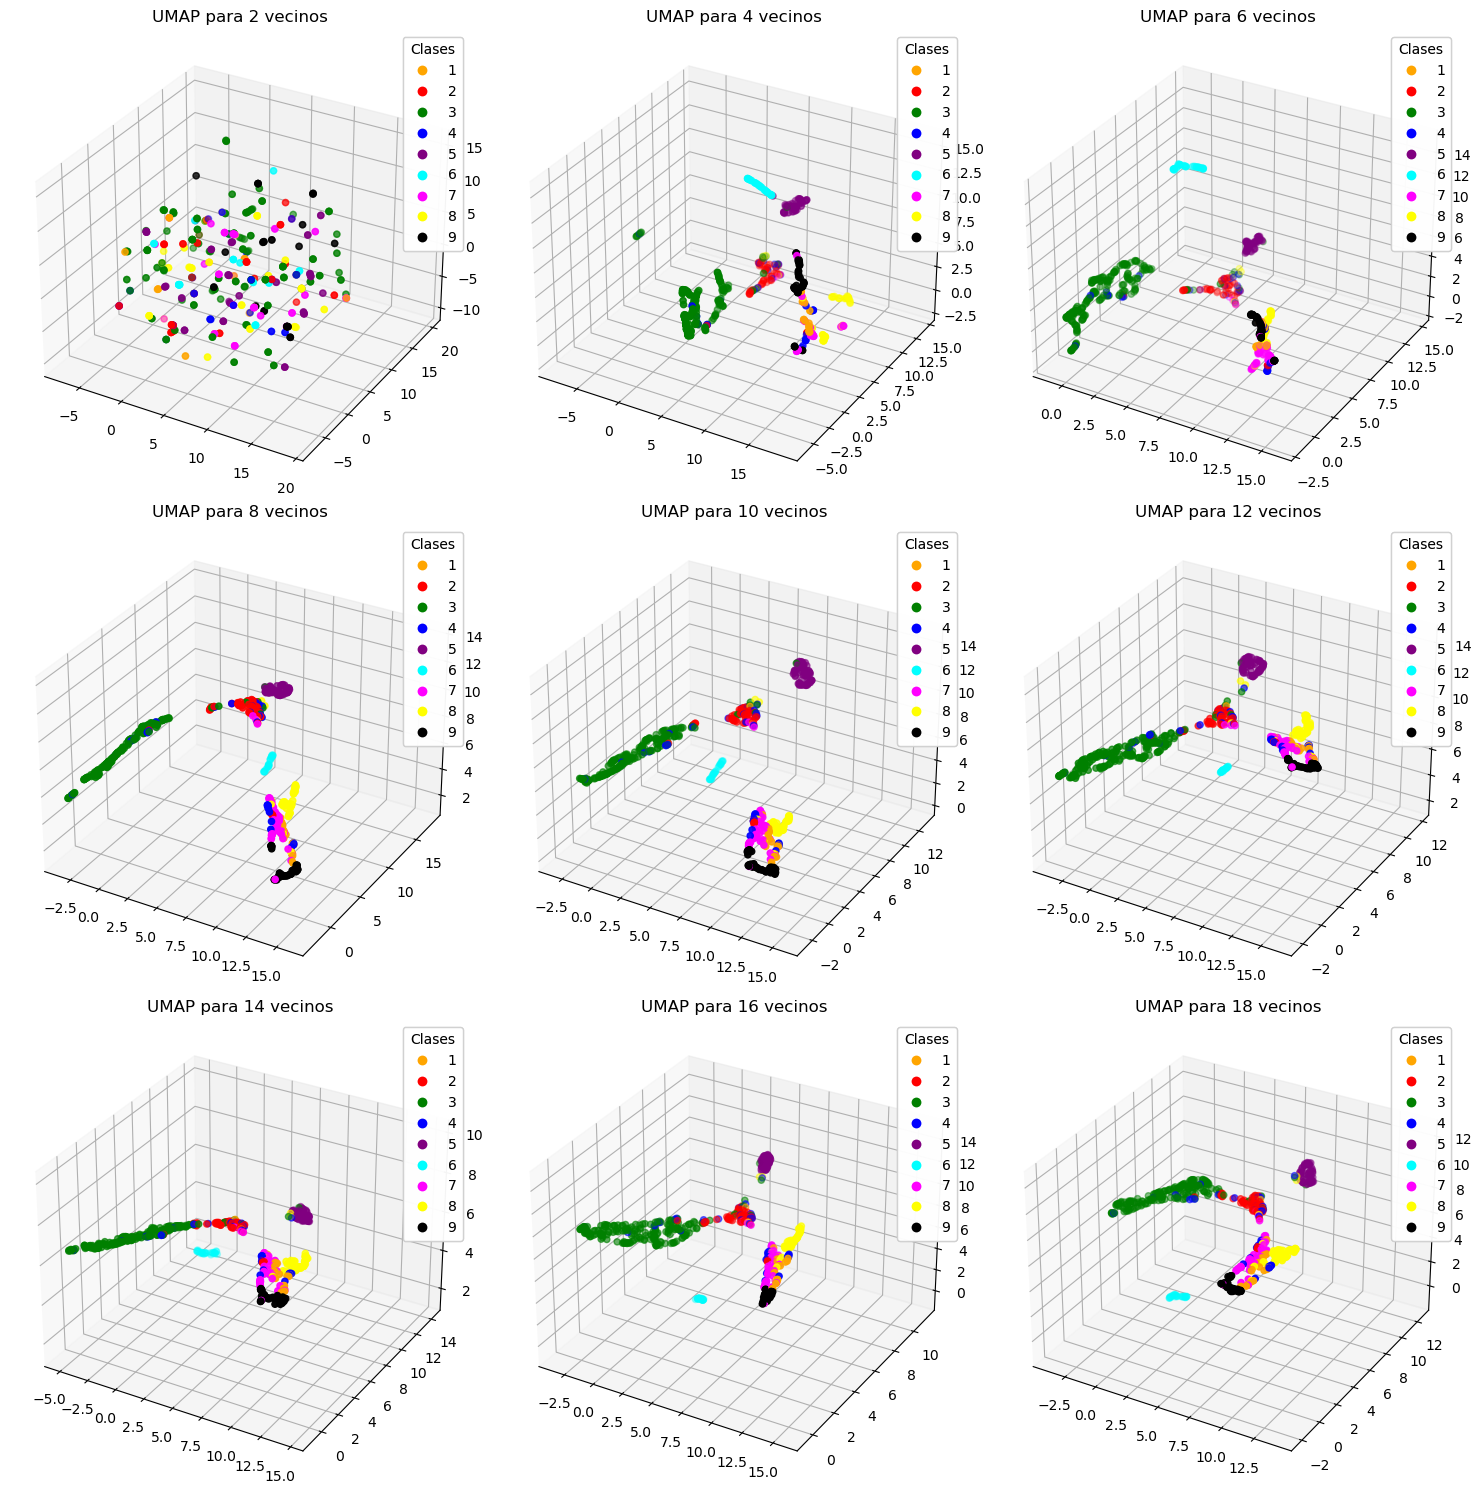

In [30]:
# Definir un colormap discreto con 9 colores
cmap = ListedColormap(["orange", "red", "green", "blue", "purple", "cyan", "magenta", "yellow", "black"])

vecinos = range(2, 20, 2)
fig, axes = plt.subplots(3, 3, figsize=(15, 15), subplot_kw={'projection': '3d'})

for i, v in enumerate(vecinos):
    row = i // 3
    col = i % 3
    
    %time embeddingUMAP3d = umap.UMAP(n_neighbors=v, n_components=3).fit_transform(X)
    
    # Scatter plot en 3D usando Matplotlib
    scatter = axes[row, col].scatter(embeddingUMAP3d[:, 0], embeddingUMAP3d[:, 1], embeddingUMAP3d[:, 2], c=list(y9), cmap=cmap)
    axes[row, col].set_title('UMAP para {} vecinos'.format(v))
    
    # Agregar la leyenda de colores
    legend1 = axes[row, col].legend(*scatter.legend_elements(), title="Clases", loc="upper right")
    axes[row, col].add_artist(legend1)

    # Aumentar los límites de los ejes
    axes[row, col].set_xlim(embeddingUMAP3d[:, 0].min() - 1, embeddingUMAP3d[:, 0].max() + 3)
    axes[row, col].set_ylim(embeddingUMAP3d[:, 1].min() - 1, embeddingUMAP3d[:, 1].max() + 3)
    axes[row, col].set_zlim(embeddingUMAP3d[:, 2].min() - 1, embeddingUMAP3d[:, 2].max() + 3)

plt.tight_layout()
plt.show()


Después de analizar los resultados obtenidos con UMAP en 3D, se observa una tendencia similar a la obtenida en la proyección bidimensional de UMAP2D. El agrupamiento para 2 vecinos resulta poco efectivo, no hay agrupamiento alguno. Por otro lado, parece que se alcanza un mejor agrupamiento al considerar 4 o más vecinos. Sin embargo, a partir de 16 vecinos, los grupos comienzan a fusionarse en exceso.

Después de evaluar los resultados, se concluye que el número óptimo de vecinos para lograr la mejor representación del conjunto de datos es de 8. Aunque los valores 6 y 10 también podrían ser considerados. 

## 3.- Dimensionalidad Intrínseca del Dataset.

Realiza un estudio para averiguar la dimensionalidad intrínseca del dataset.

Hay varias formas de determinar la dimensionalidad intrínseca de un conjunto de datos. Vamos a hacer uso de 2 métodos bastante conocidos:
* Spectral Gap [Análisis de Valor Propio]: Calculamos los valores propios de la matriz Laplaciana y observamos el "spectral gap", que es la diferencia entre los primeros dos valores propios más grandes. 
* Box-counting: Consiste en contar el número mínimo de cajas (o cuadrados) de tamaño decreciente necesarias para cubrir un objeto o conjunto de datos. Hacemos una regresión para distintos valores del tamaño de dichas cajas.

In [31]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh

#### Spectral GAP

Puesto que cada vez que se ejecuta este fragmento superior de código, la diagonalización es numéricamente distinta, voy a cargar desde la memoria del proyecto un par de plots de referencia. Justificaré mi respuesta sobre ellos: 

![Plot_1](data/autovalores_olives_gap.png)
![Plot_2](data/autovalores_olives_gapb.png)

El mayor salto de valor entre los autovectores ordenados ocurre entre el tercero y el cuarto. Y ocurre en la mayoría de ocasiones (la diagonalización es numéricamente distinta cada vez que se ejecuta). Es por eso que podríamos afirmar que la dimensionalidad intrínseca de nuestro dataset es 3.

#### Box-Counting

Vamos a usar la función del notebook de Box_Counting:


In [32]:

def fractal_dimension_nd(array, max_box_size=None, min_box_size=1, n_samples=15, n_offsets=0, plot=False):
    """Calcula la dimensión fractal de un arreglo multidimensional.

    Args:
        array (np.ndarray): El arreglo para calcular la dimensión fractal.
        max_box_size (int): El tamaño de la caja más grande, dado como la potencia de 2 para que
                            2**max_box_size dé la longitud de lado de la caja más grande.
        min_box_size (int): El tamaño de la caja más pequeña, dado como la potencia de 2 para que
                            2**min_box_size dé la longitud de lado de la caja más pequeña.
                            Valor predeterminado 1.
        n_samples (int): número de escalas a medir.
        n_offsets (int): número de desplazamientos a buscar para encontrar el conjunto más pequeño N(s) que
                       cubre todos los puntos> 0.

    """
    # Determine las escalas a medir
    if max_box_size is None:
        max_box_size = int(np.floor(np.log2(np.min(array.shape))))
    scales = np.floor(np.logspace(max_box_size, min_box_size, num=n_samples, base=2))
    scales = np.unique(scales)

    # Obtener las posiciones de todos los puntos no cero
    locs = np.where(array > 0)
    points = np.array([loc for loc in zip(*locs)])

    # Contar la cantidad mínima de cajas tocadas
    Ns = []
    # Iterar sobre todas las escalas
    for scale in scales:
        touched = []
        if n_offsets == 0:
            offsets = [0]
        else:
            offsets = np.linspace(0, scale, n_offsets)
        # Buscar sobre todos los desplazamientos
        for offset in offsets:
            bin_edges = [np.arange(0, i, scale) for i in array.shape]
            bin_edges = [np.hstack([0 - offset, x + offset]) for x in bin_edges]
            H1, e = np.histogramdd(points, bins=bin_edges)
            touched.append(np.sum(H1 > 0))
        Ns.append(touched)
    Ns = np.array(Ns)

    # De todos los conjuntos N encontrados, mantener el más pequeño en cada escala
    Ns = Ns.min(axis=1)

    # Mantener solo las escalas en las que Ns cambió
    scales = np.array([np.min(scales[Ns == x]) for x in np.unique(Ns)])

    Ns = np.unique(Ns)
    Ns = Ns[Ns > 0]
    scales = scales[:len(Ns)]
    # Realizar ajuste
    coeffs = np.polyfit(np.log(1 / scales), np.log(Ns), 1)

    # Hacer gráfico
    if plot:
        import matplotlib.pyplot as plt
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.scatter(np.log(1 / scales), np.log(np.unique(Ns)), c="teal", label="Razones medidas")
        ax.set_ylabel("$\log N(\epsilon)$")
        ax.set_xlabel("$\log 1/ \epsilon$")
        fitted_y_vals = np.polyval(coeffs, np.log(1 / scales))
        ax.plot(np.log(1 / scales), fitted_y_vals, "k--", label=f"Ajuste: {np.round(coeffs[0], 3)}X+{coeffs[1]}")
        ax.legend()
        plt.show()

    return coeffs[0]

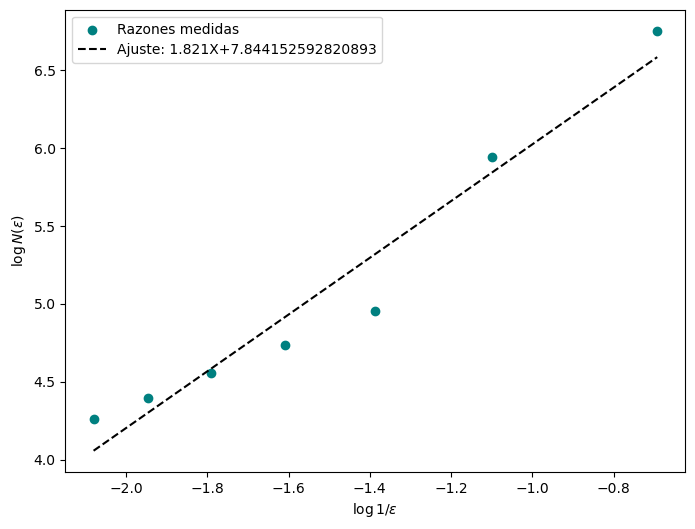

Dimensión fractal del conjunto de datos: 1.8213566482323371


In [33]:
fd = fractal_dimension_nd(X, n_offsets=15, n_samples=25, plot=True)
print(f"Dimensión fractal del conjunto de datos: {fd}")

Usando Box_counting, la dimensión intrínseca que estima el método es 1.8, que podríamos aproximar a 2. Recordemos que nuestros datos tiene 8 dimensiones y que si con un método estimamos que la dimensión intrínseca es 3, y con otro 2, ambas son estimaciones razonables a tener en cuenta.

### 4.- Reducción de la dimensionalidad y clasificación de los aceites en Regions y Areas.

- Separa el conjunto de datos en train (70%) y test (30%).
- Reduce la dimensionalidad del dataset utilizando los métodos espectrales vistos en clase. Investiga qué valor de número de vecinos es el más adecuado para el número de componentes que consideres adecuado en función del estudio de la dimensionalidad intrínseca.
- Elige el algoritmo de clasificación que consideres oportuno para resolver un problema de este tipo y aplícalo a estos datos.
- ¿Qué algoritmo de reducción de la dimensionalidad obtiene el mejor score para clasificar los datos en regiones? ¿Y en áreas? ¿Es el procedimiento más rápido en términos de tiempo de ejecución? Realiza una tabla con el rendimiento de la clasificación de cada algoritmo de reducción de dimensionaidad y el tiempo de ejecución.

In [147]:
import os
import sys

from time import time
from sklearn.svm import SVC
from matplotlib import offsetbox
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE
from sklearn import (manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection, metrics)

#### 4.1 Clasificación 3 grupos: Region (y3)

- Separa el conjunto de datos en train (70%) y test (30%).

Nota: hemos hecho uso de `stratify` para qye las clases queden balanceadas tanto en test como en train después de separar los datos de `X`.

In [153]:
# Region y3
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X, y3, test_size=0.3, random_state=0, stratify=y3)

- Reduce la dimensionalidad del dataset utilizando los métodos espectrales vistos en clase. Investiga qué valor de número de vecinos es el más adecuado para el número de componentes que consideres adecuado en función del estudio de la dimensionalidad intrínseca.

Vamos a reducir la dimensionalidad con métodos Manifold. Los métodos que hemos estudiado son:
- `MDS`
- `UMAP`
- `T-SNE`
- `ISOMAP`
- `Spectral Embedding`
- `Local Lineal Embedding`

En el anterior apartado comprobamos que la dimensión intrínseca de nuestros datos era 2-3. Por eso vamos a aplicar los distintos métodos con `n_components=3`. Para cada uno haremos una representación bi (2D) y tridimensional (3D).

In [164]:
print()
# MDS embedding
print("Método MDS")

matriz_distancias = euclidean_distances(X_train_R)
mds = MDS(metric=True,
          n_components=3,
          random_state=42,
          normalized_stress=False,
          dissimilarity="precomputed")

X_mds_c3 = mds.fit_transform(matriz_distancias)

print("---------------------------------")
print("")
# UMAP embedding
print("Método UMAP")

umap_3d = umap.UMAP(n_components=3,
                    random_state=42,
                    n_neighbors=20,
                    verbose=True)
                    
X_umap_c3 = umap_3d.fit_transform(X_train_R)

print("---------------------------------")
print("")
# t-SNE embedding
print("Método t-SNE")

tsne_3d  = TSNE(n_components=3,
                random_state=42,
                perplexity=60,
                metric="euclidean",
                verbose=True) 
                      
X_tsne_c3 = tsne_3d.fit_transform(X_train_R)

print("---------------------------------")
print("")
# Isomap embedding
print("Método Isomap")

ISO_3d = Isomap(n_components=3,
                n_neighbors=20)

X_iso_c3 = ISO_3d.fit_transform(X_train_R)


print("---------------------------------")
print("")
# Spectral embedding
print("Método Spectral")

SPE_3d = SpectralEmbedding(n_components=3,
                            n_neighbors=20,
                            random_state=42,
                            affinity="nearest_neighbors")

X_spe_c3 = SPE_3d.fit_transform(X_train_R)

print("---------------------------------")
print("")
# LLE embedding
print("Método LLE")

LLE_3d = LocallyLinearEmbedding(n_components=3,
                                n_neighbors=20,
                                random_state=42,
                                method='standard',
                                eigen_solver='dense')

X_lle_c3 = LLE_3d.fit_transform(X_train_R)

print("---------------------------------")
print("")





Método MDS
---------------------------------

Método UMAP
UMAP(n_components=3, n_neighbors=20, random_state=42, verbose=True)
Sat Mar  9 22:20:52 2024 Construct fuzzy simplicial set
Sat Mar  9 22:20:52 2024 Finding Nearest Neighbors
Sat Mar  9 22:20:52 2024 Finished Nearest Neighbor Search
Sat Mar  9 22:20:52 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar  9 22:20:53 2024 Finished embedding
---------------------------------

Método t-SNE
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 139.265480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.011871
[t-SNE] KL divergence after 700 iterations: 0.131364
---------------------------------

Método Isomap
---------------------------------

Método Spectral
---------------------------------

Método LLE
---------------------------------



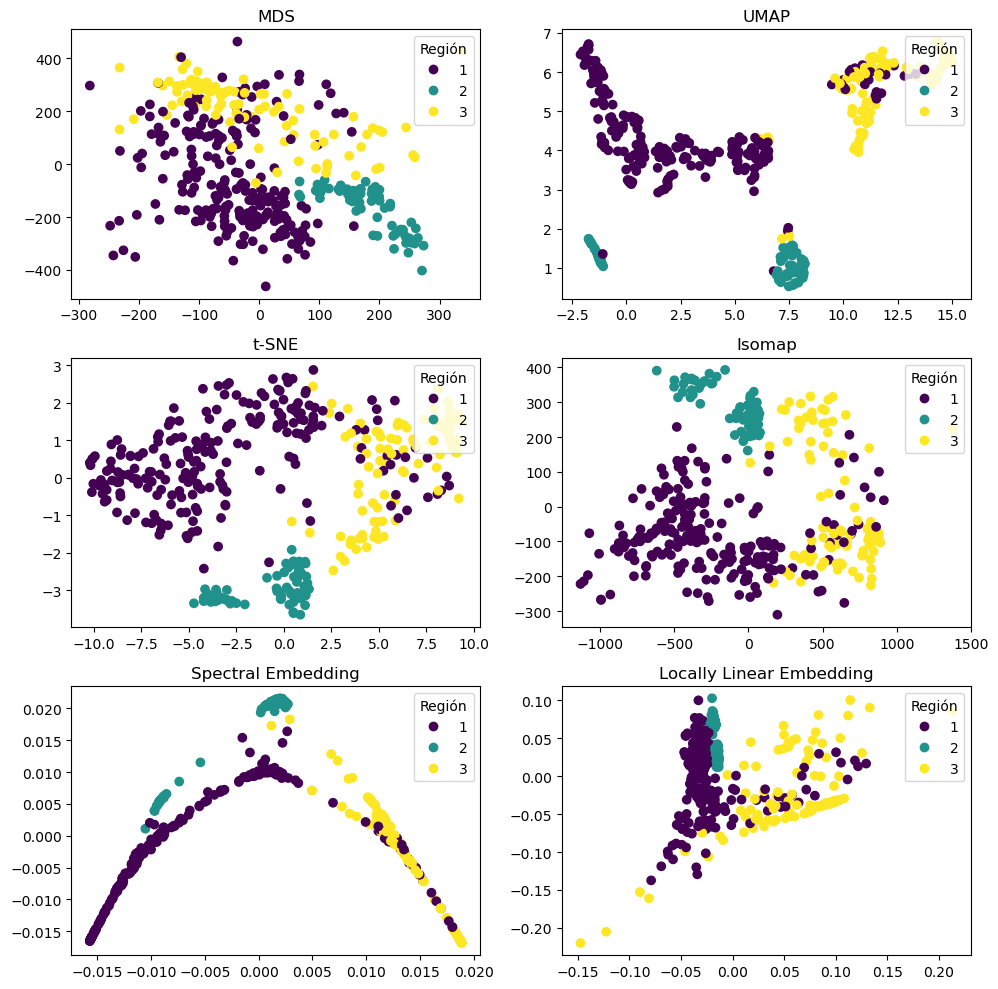

In [73]:
# Create a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot X_mds_c3
modelo1 = axs[0, 0].scatter(X_mds_c3[:, 0], X_mds_c3[:, 1], c=y_train_R)
axs[0, 0].set_title('MDS')
legend1 = axs[0, 0].legend(*modelo1.legend_elements(), title="Región", loc="upper right")


# Plot X_umap_c3
modelo2 = axs[0, 1].scatter(X_umap_c3[:, 0], X_umap_c3[:, 1], c=y_train_R)
axs[0, 1].set_title('UMAP')
legend2 = axs[0, 1].legend(*modelo2.legend_elements(), title="Región", loc="upper right")


# Plot X_tsne_c3
modelo3 = axs[1, 0].scatter(X_tsne_c3[:, 0], X_tsne_c3[:, 1], c=y_train_R)
axs[1, 0].set_title('t-SNE')
legend3 = axs[1, 0].legend(*modelo3.legend_elements(), title="Región", loc="upper right")


# Plot X_iso_c3
modelo4 = axs[1, 1].scatter(X_iso_c3[:, 0], X_iso_c3[:, 1], c=y_train_R)
axs[1, 1].set_title('Isomap')
legend4 = axs[1, 1].legend(*modelo4.legend_elements(), title="Región", loc="upper right")

# Plot X_spe_c3
modelo5 = axs[2, 0].scatter(X_spe_c3[:, 0], X_spe_c3[:, 1], c=y_train_R)
axs[2, 0].set_title('Spectral Embedding')
legend5 = axs[2, 0].legend(*modelo5.legend_elements(), title="Región", loc="upper right")

# Plot X_lle_c3
modelo6 = axs[2, 1].scatter(X_lle_c3[:, 0], X_lle_c3[:, 1], c=y_train_R)
axs[2, 1].set_title('Locally Linear Embedding')
legend6 = axs[2, 1].legend(*modelo6.legend_elements(), title="Región", loc="upper right")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



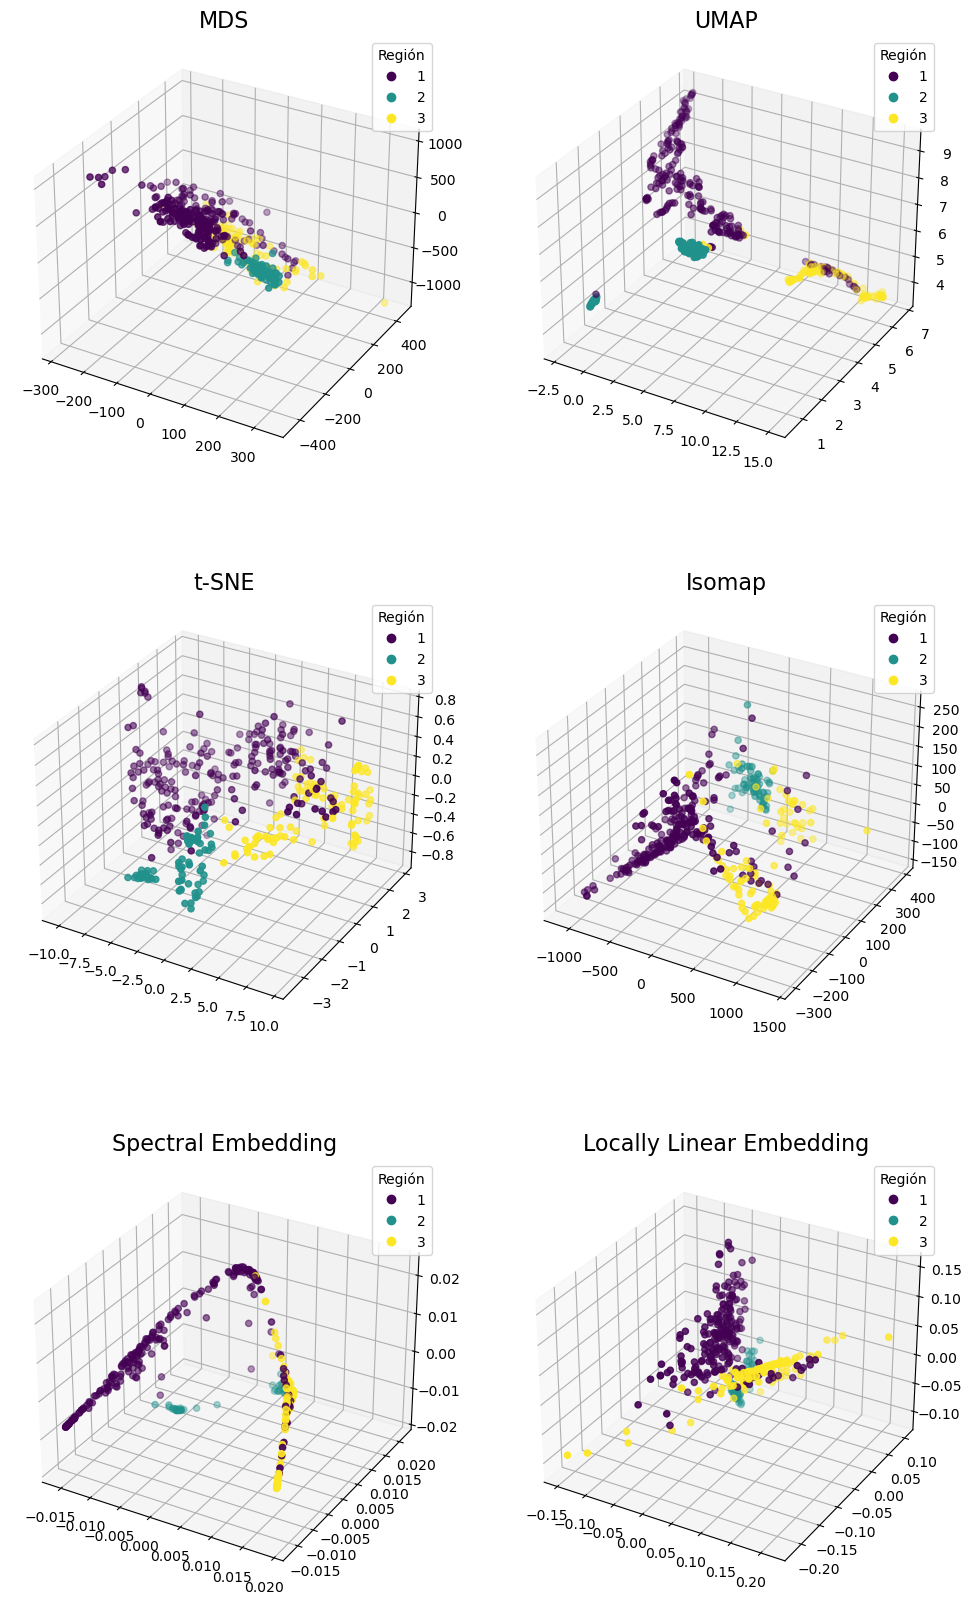

In [214]:
# Create a grid of subplots
fig = plt.figure(figsize=(14, 17))
axs = fig.subplots(3, 2, subplot_kw={'projection': '3d'})

# Plot X_mds_c3
modelo1 = axs[0, 0].scatter(X_mds_c3[:, 0], X_mds_c3[:, 1], X_mds_c3[:, 2], c=y_train_R)
axs[0, 0].set_title('MDS', fontsize=16)
legend1 = axs[0, 0].legend(*modelo1.legend_elements(), title="Región", loc="upper right")

# Plot X_umap_c3
modelo2 = axs[0, 1].scatter(X_umap_c3[:, 0], X_umap_c3[:, 1], X_umap_c3[:, 2], c=y_train_R)
axs[0, 1].set_title('UMAP', fontsize=16)
legend1 = axs[0, 1].legend(*modelo2.legend_elements(), title="Región", loc="upper right")

# Plot X_tsne_c3
modelo3 = axs[1, 0].scatter(X_tsne_c3[:, 0], X_tsne_c3[:, 1], X_tsne_c3[:, 2], c=y_train_R)
axs[1, 0].set_title('t-SNE', fontsize=16)
legend1 = axs[1, 0].legend(*modelo3.legend_elements(), title="Región", loc="upper right")

# Plot X_iso_c3
modelo4 = axs[1, 1].scatter(X_iso_c3[:, 0], X_iso_c3[:, 1], X_iso_c3[:, 2], c=y_train_R)
axs[1, 1].set_title('Isomap', fontsize=16)
legend1 = axs[1, 1].legend(*modelo4.legend_elements(), title="Región", loc="upper right")

# Plot X_spe_c3
modelo5 = axs[2, 0].scatter(X_spe_c3[:, 0], X_spe_c3[:, 1], X_spe_c3[:, 2], c=y_train_R)
axs[2, 0].set_title('Spectral Embedding', fontsize=16)
legend1 = axs[2, 0].legend(*modelo5.legend_elements(), title="Región", loc="upper right")

# Plot X_lle_c3
modelo6 = axs[2, 1].scatter(X_lle_c3[:, 0], X_lle_c3[:, 1], X_lle_c3[:, 2], c=y_train_R)
axs[2, 1].set_title('Locally Linear Embedding', fontsize=16)
legend1 = axs[2, 1].legend(*modelo6.legend_elements(), title="Región", loc="upper right")

plt.subplots_adjust(top=0.11, bottom=0.1, left=0.1, right=0.9, hspace=0.8, wspace=0.5)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



- Elige el algoritmo de clasificación que consideres oportuno para resolver un problema de este tipo y aplícalo a estos datos.

Aunque podríamos preparar y entrenar una red neuronal, vamos a clasificar supervisadametne con un `SVC:` Support Vector Classifier, que es mucho más rapido de implementar. 

In [165]:
clas_SVC=SVC(kernel='rbf')

modelos=['MDS','LLE','UMAP','TSNE','Iso-Map','Spectral','Datos Originales']
xtrain=[X_mds_c3,X_lle_c3,X_umap_c3,X_tsne_c3,X_iso_c3,X_spe_c3,X_train_R]

for m,x in zip(modelos,xtrain):
    modelo_mudo=clas_SVC.fit(x,y_train_R)
    accuracy_train=metrics.accuracy_score(y_train_R,modelo_mudo.predict(x))
    print('Acierto en train',m,': ',round(accuracy_train,3))


Acierto en train MDS :  0.92
Acierto en train LLE :  0.922
Acierto en train UMAP :  0.912
Acierto en train TSNE :  0.915
Acierto en train Iso-Map :  0.918
Acierto en train Spectral :  0.918
Acierto en train Datos Originales :  0.75


In [166]:
# Ahora queremos evaluar el conjunto test. Pero solo  LLE e isomap, t-SNE y UMAP 
# permiten hacer transform en TEST. Lo hacemos con ellos. 
# old_stdout = sys.stdout
# sys.stdout = open(os.devnull, 'w')
# código que saque cosas obligatorias
#sys.stdout = old_stdout


#Este chunk es un poco redundante. Nos valdría con los modelos de hace un par de chunks.
#Pongo todo esto para poder hacer pruebas y modificaciones.

LLE_3d_ac = LocallyLinearEmbedding(
                    n_components=3,
                    n_neighbors=20,
                    random_state=42,
                    method='standard',
                    eigen_solver='dense')

X_lle_c3 = LLE_3d.fit_transform(X_train_R)


ISO_3d_ac = Isomap( 
                    n_components=3,
                    n_neighbors=20)

X_iso_c3 = ISO_3d.fit_transform(X_train_R)

umap_3d_ac = umap.UMAP(
                    n_components=3,
                    random_state=42,
                    n_neighbors=20,
                    verbose=False)  


X_umap_c3 = umap_3d.fit_transform(X_train_R)


tsne_3d_ac  = openTSNE( 
                    n_components=3,
                    random_state=42,
                    perplexity=60,
                    metric="euclidean",
                    verbose=False) 

tsne_3d_ac_test = tsne_3d_ac.fit(X_train_R)
X_tsn_3d_ac = tsne_3d_ac_test.transform(X_train_R)



UMAP(n_components=3, n_neighbors=20, random_state=42, verbose=True)
Sat Mar  9 22:21:00 2024 Construct fuzzy simplicial set
Sat Mar  9 22:21:00 2024 Finding Nearest Neighbors
Sat Mar  9 22:21:00 2024 Finished Nearest Neighbor Search
Sat Mar  9 22:21:00 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar  9 22:21:02 2024 Finished embedding


In [168]:
constr =[LLE_3d_ac,ISO_3d_ac,umap_3d_ac]
models =['LLE','Iso-Map','UMAP']
xtrain =[X_lle_c3,X_iso_c3,X_umap_c3]

for c in constr:
    c.fit(X_train_R)

# Transforma tanto los datos de entrenamiento como los de prueba
X_train_transformado = [c.transform(X_train_R) for c in constr]
X_test_transformado = [c.transform(X_test_R) for c in constr]

# Entrena y evalúa el modelo con los datos de entrenamiento transformados
for m, x_train, x_test in zip(models, X_train_transformado, X_test_transformado):
    modelo = clas_SVC.fit(x_train, y_train_R)
    accuracy_test = metrics.accuracy_score(y_test_R, modelo.predict(x_test))
    print('Acierto en test', m, ':', round(accuracy_test,3))

# He perdido casi 2h intentando que funcione el TSNE en test. No lo he conseguido.
# Lo tengo que poner por separado. Hay alguna incompatibilidad con fit y transform.

X_tr_prueba = tsne_3d_ac_test.transform(X_test_R)
modelo = clas_SVC.fit(X_tsn_3d_ac, y_train_R)
accuracy_test = metrics.accuracy_score(y_test_R,modelo.predict(X_tr_prueba))
print('Acierto en test TSNE : ',round(accuracy_test,3))

modelo = clas_SVC.fit(X_train_R, y_train_R)
accuracy_test = metrics.accuracy_score(y_test_R, modelo.predict(X_test_R))
print('Acierto en test Datos Originales:', round(accuracy_test, 3))



c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Acierto en test LLE : 0.884
Acierto en test Iso-Map : 0.895
Acierto en test UMAP : 0.901
Acierto en test TSNE :  0.901
Acierto en test Datos Originales: 0.721


Tanto UMAP como TSNE son los que mejor consiguen separar los datos, para luego poder ser clasificados con menor error. A continuación vamos a buscar el número óptimo de vecinos. TSNE usa el hiperparámetro `perplexity` en vez de vecinos. Habitualmente vale 30, que es el doble de vecinos por defecto del resto de métodos. Esto lo tendremos en cuenta a la hora de hacer la búsqueda del mejor valor:



In [ ]:
vecinos=range(2,31)
factor_p = 2

lle_accuracy_train =[]
lle_accuracy_test  =[]

im_accuracy_train  =[]
im_accuracy_test   =[]

tsne_accuracy_train=[]
tsne_accuracy_test =[]

umap_accuracy_train=[]
umap_accuracy_test =[]

# Definir los parámetros del clasificador SVC
clasificador = SVC(kernel='rbf')

for v in vecinos:
    print()
    print()
    print('---------------------------------')
    print('Calculando para ', v, 'vecinos')
    print('---------------------------------')

    LLE_3d = LocallyLinearEmbedding(n_components=3,
                                    n_neighbors=v,
                                    random_state=42,
                                    method='standard',
                                    eigen_solver='dense')

    X_tr_param = LLE_3d.fit_transform(X_train_R)
    X_te_param = LLE_3d.transform(X_test_R)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_R)

    lle_accuracy_train.append(metrics.accuracy_score(y_train_R, clasificador.predict(X_tr_param)))
    lle_accuracy_test.append(metrics.accuracy_score(y_test_R, clasificador.predict(X_te_param)))

    #----------

    ISO_3d = Isomap(n_components=3,
                    n_neighbors=v)

    X_tr_param = ISO_3d.fit_transform(X_train_R)
    X_te_param = ISO_3d.transform(X_test_R)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_R)

    im_accuracy_train.append(metrics.accuracy_score(y_train_R, clasificador.predict(X_tr_param)))
    im_accuracy_test.append(metrics.accuracy_score(y_test_R, clasificador.predict(X_te_param)))

    #----------

    tsne_3d  = openTSNE(n_components=3,
                    random_state=42,
                    perplexity=factor_p*v,
                    metric="euclidean",
                    verbose=False) 
                      
    X_tsne_c3 = tsne_3d.fit(X_train_R)
    X_tr_param = X_tsne_c3.transform(X_train_R)
    X_te_param = X_tsne_c3.transform(X_test_R)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_R)

    tsne_accuracy_train.append(metrics.accuracy_score(y_train_R, clasificador.predict(X_tr_param)))
    tsne_accuracy_test.append(metrics.accuracy_score(y_test_R, clasificador.predict(X_te_param)))

    #----------

    umap_3d = umap.UMAP(n_components=3,
                        random_state=42,
                        n_neighbors=v,
                        verbose=False)
                    
    X_tr_param = umap_3d.fit_transform(X_train_R)
    X_te_param = umap_3d.transform(X_test_R)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_R)

    umap_accuracy_train.append(metrics.accuracy_score(y_train_R, clasificador.predict(X_tr_param)))
    umap_accuracy_test.append(metrics.accuracy_score(y_test_R, clasificador.predict(X_te_param)))


    print('---------------------------------')



In [202]:

# Crear el DataFrame a partir del diccionario
df_accuracy = pd.DataFrame({
    'vecinos': vecinos,
    'perplexity': [factor_p*v for v in vecinos],
    'lle_accuracy_train': lle_accuracy_train,
    'lle_accuracy_test': lle_accuracy_test,
    'im_accuracy_train': im_accuracy_train,
    'im_accuracy_test': im_accuracy_test,
    'tsne_accuracy_train': tsne_accuracy_train,
    'tsne_accuracy_test': tsne_accuracy_test,
    'umap_accuracy_train': umap_accuracy_train,
    'umap_accuracy_test': umap_accuracy_test
    })


# Imprimir el DataFrame
print(df_accuracy)

    vecinos  perplexity  lle_accuracy_train  lle_accuracy_test  \
0         2           4              0.7675           0.790698   
1         3           6              0.8950           0.854651   
2         4           8              0.9150           0.889535   
3         5          10              0.9100           0.895349   
4         6          12              0.9275           0.906977   
5         7          14              0.9400           0.918605   
6         8          16              0.9325           0.912791   
7         9          18              0.9300           0.930233   
8        10          20              0.9525           0.953488   
9        11          22              0.9325           0.953488   
10       12          24              0.9275           0.936047   
11       13          26              0.9175           0.877907   
12       14          28              0.9475           0.959302   
13       15          30              0.9525           0.953488   
14       1

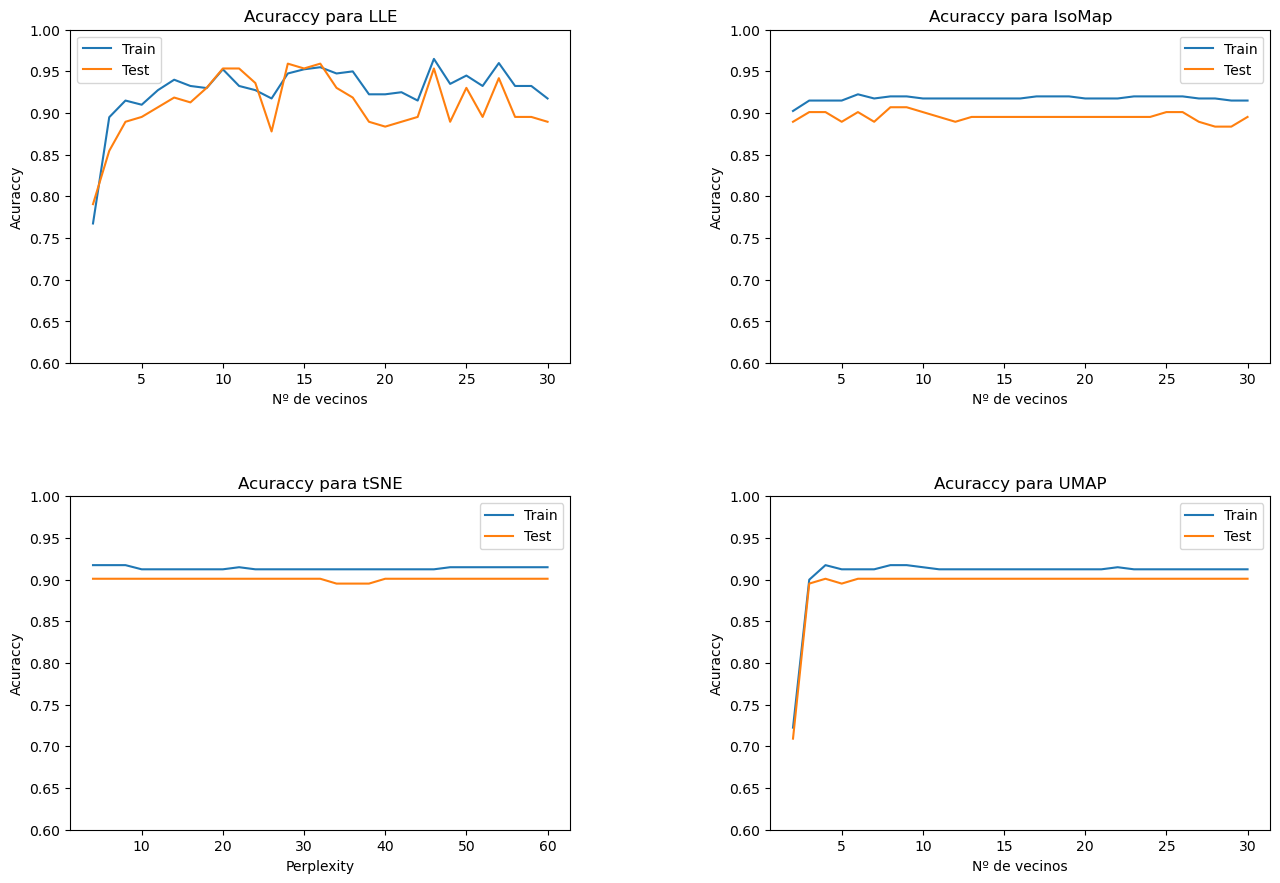

In [205]:
%matplotlib inline
p = [i * 2 for i in [*vecinos]]

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(221)
plt.plot(vecinos,lle_accuracy_train,label='Train')
plt.plot(vecinos,lle_accuracy_test,label='Test')
plt.ylim([.6,1])
plt.xlabel('Nº de vecinos')
plt.ylabel('Acuraccy')
plt.legend()
plt.title('Acuraccy para LLE')

plt.subplot(222)
plt.plot(vecinos,im_accuracy_train,label='Train')
plt.plot(vecinos,im_accuracy_test,label='Test')
plt.ylim([.6,1])
plt.xlabel('Nº de vecinos')
plt.ylabel('Acuraccy')
plt.legend()
plt.title('Acuraccy para IsoMap')


plt.subplot(223)
plt.plot(p,tsne_accuracy_train,label='Train')
plt.plot(p,tsne_accuracy_test,label='Test')
plt.xlabel('Perplexity')
plt.ylabel('Acuraccy')
plt.ylim([.6,1])
plt.legend()
plt.title('Acuraccy para tSNE')

plt.subplot(224)
plt.plot(vecinos,umap_accuracy_train,label='Train')
plt.plot(vecinos,umap_accuracy_test,label='Test')
plt.xlabel('Nº de vecinos')
plt.ylabel('Acuraccy')
plt.ylim([.6,1])
plt.legend()
plt.title('Acuraccy para UMAP')


plt.show()


En el método LLE, el modelo mejora al incrementar el número de vecinos, alcanzando un máximo de aproximadamente 95% de precisión con varias configuraciones de vecinos. Sin embargo, el método es muy inconsistente, hay también varias configuraciones que rondan una preción del 87%. Probablemente 15 vecinos sea un valor óptimo.

En IsoMap, la precisión permanece cerca del 90% independientemente del número de vecinos considerados. Además, se nota que la precisión en el conjunto de entrenamiento tiende a ser ligeramente mayor que en el conjunto de prueba. Es posible que con más muestras o un mejor clasificador fuésemos capaces de solapar ambas curvas.

En tSNE, se registra una precisión cercana al 90% para el conjunto de test y ligeramente superior para el conjunto de entrenamiento, sin importar el valor de perplexity utilizado. Muy estable pese a que es más lento que otros métodos, aún así, merece la pena.

En UMAP, se experimenta un aumento significativo en la precisión al aumentar el número de vecinos de 2 a 3. Después de este punto, la precisión se mantiene estable alrededor del 90%.

Respecto al tiempo de computación, tSNE requiere considerablemente más tiempo en comparación con los otros métodos, cuyos tiempos de ejecución son significativamente menores.

#### 4.2 Clasificación 9 grupos

Vamos a repetir todo, pero esta vez con las áreas, no con los grupos. Estamos seguros que la clasificación no será tan buena porque en apartados anteriores hemos visto que pese a usar umap o tsne, los grupos en ocasiones se superponían completamente. Es posible que provemos a aumentar el número de componentes, pese a que la dimensionalidad intrínseca asegura que la dimensión del conjunto de datos es 2-3.

In [206]:
# Área y9
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y9, test_size=0.3, random_state=0, stratify=y3)

In [207]:
print()
# MDS embedding
print("Método MDS")

matriz_distancias = euclidean_distances(X_train_A)
mds = MDS(metric=True,
          n_components=3,
          random_state=42,
          normalized_stress=False,
          dissimilarity="precomputed")

X_mds_c3 = mds.fit_transform(matriz_distancias)

print("---------------------------------")
print("")
# UMAP embedding
print("Método UMAP")

umap_3d = umap.UMAP(n_components=3,
                    random_state=42,
                    n_neighbors=20,
                    verbose=True)
                    
X_umap_c3 = umap_3d.fit_transform(X_train_A)

print("---------------------------------")
print("")
# t-SNE embedding
print("Método t-SNE")

tsne_3d  = TSNE(n_components=3,
                random_state=42,
                perplexity=60,
                metric="euclidean",
                verbose=True) 
                      
X_tsne_c3 = tsne_3d.fit_transform(X_train_A)

print("---------------------------------")
print("")
# Isomap embedding
print("Método Isomap")

ISO_3d = Isomap(n_components=3,
                n_neighbors=20)

X_iso_c3 = ISO_3d.fit_transform(X_train_A)


print("---------------------------------")
print("")
# Spectral embedding
print("Método Spectral")

SPE_3d = SpectralEmbedding(n_components=3,
                            n_neighbors=20,
                            random_state=42,
                            affinity="nearest_neighbors")

X_spe_c3 = SPE_3d.fit_transform(X_train_A)

print("---------------------------------")
print("")
# LLE embedding
print("Método LLE")

LLE_3d = LocallyLinearEmbedding(n_components=3,
                                n_neighbors=20,
                                random_state=42,
                                method='standard',
                                eigen_solver='dense')

X_lle_c3 = LLE_3d.fit_transform(X_train_A)

print("---------------------------------")
print("")





Método MDS
---------------------------------

Método UMAP
UMAP(n_components=3, n_neighbors=20, random_state=42, verbose=True)
Sat Mar  9 23:44:25 2024 Construct fuzzy simplicial set
Sat Mar  9 23:44:25 2024 Finding Nearest Neighbors
Sat Mar  9 23:44:25 2024 Finished Nearest Neighbor Search
Sat Mar  9 23:44:25 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar  9 23:44:26 2024 Finished embedding
---------------------------------

Método t-SNE
[t-SNE] Computing 181 nearest neighbors...
[t-SNE] Indexed 400 samples in 0.001s...
[t-SNE] Computed neighbors for 400 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 400 / 400
[t-SNE] Mean sigma: 139.265480
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.011871
[t-SNE] KL divergence after 700 iterations: 0.131364
---------------------------------

Método Isomap
---------------------------------

Método Spectral
---------------------------------

Método LLE
---------------------------------



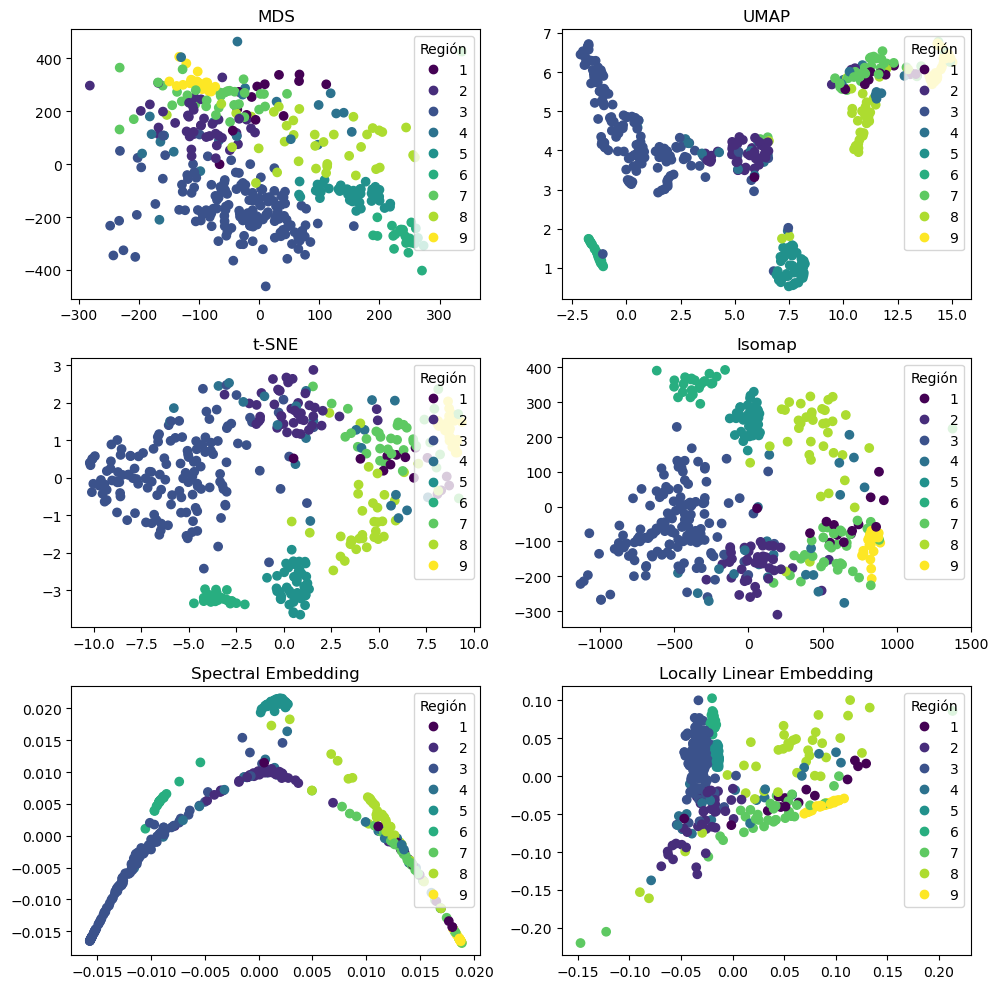

In [209]:
# Create a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Plot X_mds_c3
modelo1 = axs[0, 0].scatter(X_mds_c3[:, 0], X_mds_c3[:, 1], c=y_train_A)
axs[0, 0].set_title('MDS')
legend1 = axs[0, 0].legend(*modelo1.legend_elements(), title="Región", loc="upper right")


# Plot X_umap_c3
modelo2 = axs[0, 1].scatter(X_umap_c3[:, 0], X_umap_c3[:, 1], c=y_train_A)
axs[0, 1].set_title('UMAP')
legend2 = axs[0, 1].legend(*modelo2.legend_elements(), title="Región", loc="upper right")


# Plot X_tsne_c3
modelo3 = axs[1, 0].scatter(X_tsne_c3[:, 0], X_tsne_c3[:, 1], c=y_train_A)
axs[1, 0].set_title('t-SNE')
legend3 = axs[1, 0].legend(*modelo3.legend_elements(), title="Región", loc="upper right")


# Plot X_iso_c3
modelo4 = axs[1, 1].scatter(X_iso_c3[:, 0], X_iso_c3[:, 1], c=y_train_A)
axs[1, 1].set_title('Isomap')
legend4 = axs[1, 1].legend(*modelo4.legend_elements(), title="Región", loc="upper right")

# Plot X_spe_c3
modelo5 = axs[2, 0].scatter(X_spe_c3[:, 0], X_spe_c3[:, 1], c=y_train_A)
axs[2, 0].set_title('Spectral Embedding')
legend5 = axs[2, 0].legend(*modelo5.legend_elements(), title="Región", loc="upper right")

# Plot X_lle_c3
modelo6 = axs[2, 1].scatter(X_lle_c3[:, 0], X_lle_c3[:, 1], c=y_train_A)
axs[2, 1].set_title('Locally Linear Embedding')
legend6 = axs[2, 1].legend(*modelo6.legend_elements(), title="Región", loc="upper right")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



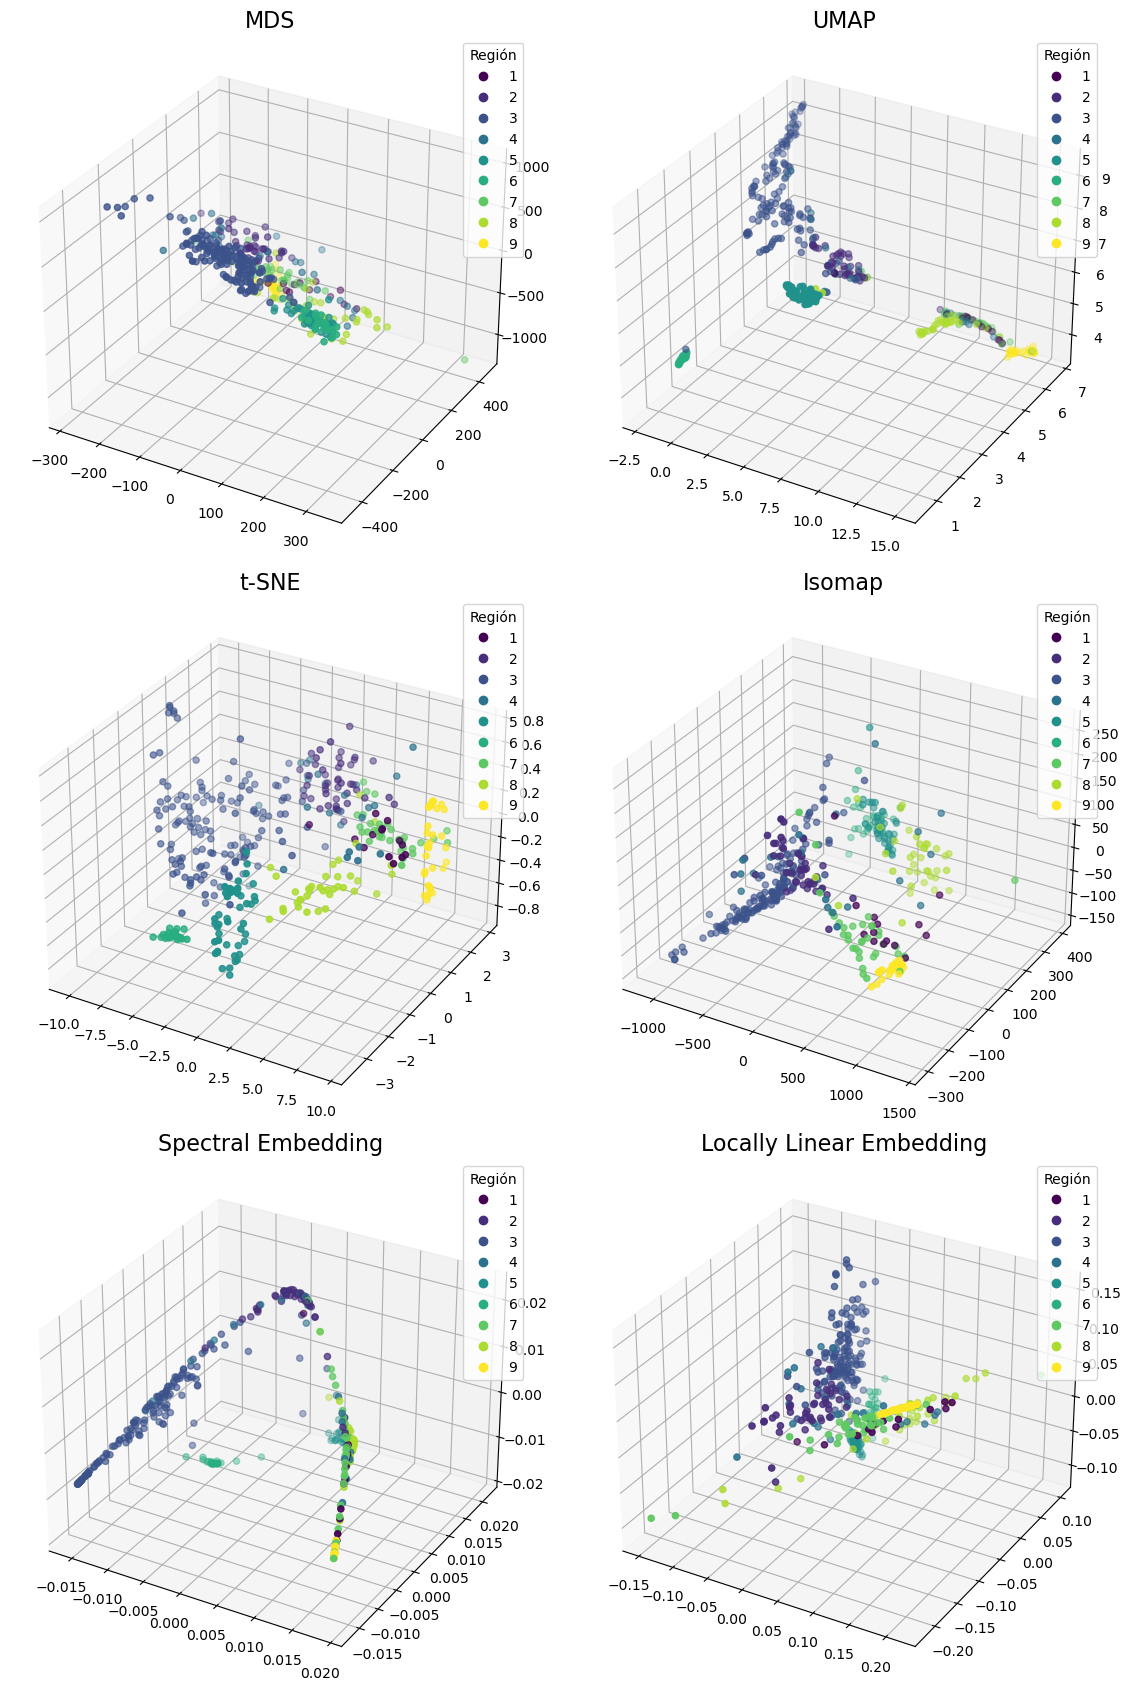

In [215]:
# Create a grid of subplots
fig = plt.figure(figsize=(12, 17))
axs = fig.subplots(3, 2, subplot_kw={'projection': '3d'})

# Plot X_mds_c3
modelo1 = axs[0, 0].scatter(X_mds_c3[:, 0], X_mds_c3[:, 1], X_mds_c3[:, 2], c=y_train_A)
axs[0, 0].set_title('MDS', fontsize=16)
legend1 = axs[0, 0].legend(*modelo1.legend_elements(), title="Región", loc="upper right")

# Plot X_umap_c3
modelo2 = axs[0, 1].scatter(X_umap_c3[:, 0], X_umap_c3[:, 1], X_umap_c3[:, 2], c=y_train_A)
axs[0, 1].set_title('UMAP', fontsize=16)
legend1 = axs[0, 1].legend(*modelo2.legend_elements(), title="Región", loc="upper right")

# Plot X_tsne_c3
modelo3 = axs[1, 0].scatter(X_tsne_c3[:, 0], X_tsne_c3[:, 1], X_tsne_c3[:, 2], c=y_train_A)
axs[1, 0].set_title('t-SNE', fontsize=16)
legend1 = axs[1, 0].legend(*modelo3.legend_elements(), title="Región", loc="upper right")

# Plot X_iso_c3
modelo4 = axs[1, 1].scatter(X_iso_c3[:, 0], X_iso_c3[:, 1], X_iso_c3[:, 2], c=y_train_A)
axs[1, 1].set_title('Isomap', fontsize=16)
legend1 = axs[1, 1].legend(*modelo4.legend_elements(), title="Región", loc="upper right")

# Plot X_spe_c3
modelo5 = axs[2, 0].scatter(X_spe_c3[:, 0], X_spe_c3[:, 1], X_spe_c3[:, 2], c=y_train_A)
axs[2, 0].set_title('Spectral Embedding', fontsize=16)
legend1 = axs[2, 0].legend(*modelo5.legend_elements(), title="Región", loc="upper right")

# Plot X_lle_c3
modelo6 = axs[2, 1].scatter(X_lle_c3[:, 0], X_lle_c3[:, 1], X_lle_c3[:, 2], c=y_train_A)
axs[2, 1].set_title('Locally Linear Embedding', fontsize=16)
legend1 = axs[2, 1].legend(*modelo6.legend_elements(), title="Región", loc="upper right")


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [216]:
clas_SVC=SVC(kernel='rbf')

modelos=['MDS','LLE','UMAP','TSNE','Iso-Map','Spectral','Datos Originales']
xtrain=[X_mds_c3,X_lle_c3,X_umap_c3,X_tsne_c3,X_iso_c3,X_spe_c3,X_train_R]

for m,x in zip(modelos,xtrain):
    modelo_mudo=clas_SVC.fit(x,y_train_A)
    accuracy_train=metrics.accuracy_score(y_train_A,modelo_mudo.predict(x))
    print('Acierto en train',m,': ',round(accuracy_train,3))

Acierto en train MDS :  0.84
Acierto en train LLE :  0.855
Acierto en train UMAP :  0.832
Acierto en train TSNE :  0.838
Acierto en train Iso-Map :  0.85
Acierto en train Spectral :  0.838
Acierto en train Datos Originales :  0.362


In [217]:
# Ahora queremos evaluar el conjunto test. Pero solo  LLE e isomap, t-SNE y UMAP 
# permiten hacer transform en TEST. Lo hacemos con ellos. 
# old_stdout = sys.stdout
# sys.stdout = open(os.devnull, 'w')
# código que saque cosas obligatorias
#sys.stdout = old_stdout


#Este chunk es un poco redundante. Nos valdría con los modelos de hace un par de chunks.
#Pongo todo esto para poder hacer pruebas y modificaciones.

LLE_3d_ac = LocallyLinearEmbedding(
                    n_components=3,
                    n_neighbors=20,
                    random_state=42,
                    method='standard',
                    eigen_solver='dense')

X_lle_c3 = LLE_3d.fit_transform(X_train_A)


ISO_3d_ac = Isomap( 
                    n_components=3,
                    n_neighbors=20)

X_iso_c3 = ISO_3d.fit_transform(X_train_A)

umap_3d_ac = umap.UMAP(
                    n_components=3,
                    random_state=42,
                    n_neighbors=20,
                    verbose=False)  


X_umap_c3 = umap_3d.fit_transform(X_train_A)


tsne_3d_ac  = openTSNE( 
                    n_components=3,
                    random_state=42,
                    perplexity=60,
                    metric="euclidean",
                    verbose=False) 

tsne_3d_ac_test = tsne_3d_ac.fit(X_train_R)
X_tsn_3d_ac = tsne_3d_ac_test.transform(X_train_A)



UMAP(n_components=3, n_neighbors=20, random_state=42, verbose=True)
Sat Mar  9 23:50:33 2024 Construct fuzzy simplicial set
Sat Mar  9 23:50:33 2024 Finding Nearest Neighbors
Sat Mar  9 23:50:33 2024 Finished Nearest Neighbor Search
Sat Mar  9 23:50:33 2024 Construct embedding


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Sat Mar  9 23:50:34 2024 Finished embedding


In [220]:
constr =[LLE_3d_ac,ISO_3d_ac,umap_3d_ac]
models =['LLE','Iso-Map','UMAP']
xtrain =[X_lle_c3,X_iso_c3,X_umap_c3]

for c in constr:
    c.fit(X_train_R)

# Transforma tanto los datos de entrenamiento como los de prueba
X_train_transformado = [c.transform(X_train_A) for c in constr]
X_test_transformado = [c.transform(X_test_A) for c in constr]

# Entrena y evalúa el modelo con los datos de entrenamiento transformados
for m, x_train, x_test in zip(models, X_train_transformado, X_test_transformado):
    modelo = clas_SVC.fit(x_train, y_train_A)
    accuracy_test = metrics.accuracy_score(y_test_A, modelo.predict(x_test))
    print('Acierto en test', m, ':', round(accuracy_test,3))

# He perdido casi 2h intentando que funcione el TSNE en test. No lo he conseguido.
# Lo tengo que poner por separado. Hay alguna incompatibilidad con fit y transform.

X_tr_prueba = tsne_3d_ac_test.transform(X_test_A)
modelo = clas_SVC.fit(X_tsn_3d_ac, y_train_A)
accuracy_test = metrics.accuracy_score(y_test_A,modelo.predict(X_tr_prueba))
print('Acierto en test TSNE : ',round(accuracy_test,3))

modelo = clas_SVC.fit(X_train_R, y_train_A)
accuracy_test = metrics.accuracy_score(y_test_A, modelo.predict(X_test_A))
print('Acierto en test Datos Originales:', round(accuracy_test, 3))



c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



Acierto en test LLE : 0.837
Acierto en test Iso-Map : 0.808
Acierto en test UMAP : 0.797
Acierto en test TSNE :  0.797
Acierto en test Datos Originales: 0.355


In [221]:
vecinos=range(2,31)
factor_p = 2

lle_accuracy_train =[]
lle_accuracy_test  =[]

im_accuracy_train  =[]
im_accuracy_test   =[]

tsne_accuracy_train=[]
tsne_accuracy_test =[]

umap_accuracy_train=[]
umap_accuracy_test =[]

# Definir los parámetros del clasificador SVC
clasificador = SVC(kernel='rbf')

for v in vecinos:
    print()
    print()
    print('---------------------------------')
    print('Calculando para ', v, 'vecinos')
    print('---------------------------------')

    LLE_3d = LocallyLinearEmbedding(n_components=3,
                                    n_neighbors=v,
                                    random_state=42,
                                    method='standard',
                                    eigen_solver='dense')

    X_tr_param = LLE_3d.fit_transform(X_train_A)
    X_te_param = LLE_3d.transform(X_test_A)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_A)

    lle_accuracy_train.append(metrics.accuracy_score(y_train_A, clasificador.predict(X_tr_param)))
    lle_accuracy_test.append(metrics.accuracy_score(y_test_A, clasificador.predict(X_te_param)))

    #----------

    ISO_3d = Isomap(n_components=3,
                    n_neighbors=v)

    X_tr_param = ISO_3d.fit_transform(X_train_A)
    X_te_param = ISO_3d.transform(X_test_A)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_A)

    im_accuracy_train.append(metrics.accuracy_score(y_train_A, clasificador.predict(X_tr_param)))
    im_accuracy_test.append(metrics.accuracy_score(y_test_A, clasificador.predict(X_te_param)))

    #----------

    tsne_3d  = openTSNE(n_components=3,
                    random_state=42,
                    perplexity=factor_p*v,
                    metric="euclidean",
                    verbose=False) 
                      
    X_tsne_c3 = tsne_3d.fit(X_train_A)
    X_tr_param = X_tsne_c3.transform(X_train_A)
    X_te_param = X_tsne_c3.transform(X_test_A)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_A)

    tsne_accuracy_train.append(metrics.accuracy_score(y_train_A, clasificador.predict(X_tr_param)))
    tsne_accuracy_test.append(metrics.accuracy_score(y_test_A, clasificador.predict(X_te_param)))

    #----------

    umap_3d = umap.UMAP(n_components=3,
                        random_state=42,
                        n_neighbors=v,
                        verbose=False)
                    
    X_tr_param = umap_3d.fit_transform(X_train_A)
    X_te_param = umap_3d.transform(X_test_A)

    clasificador = SVC(kernel='rbf')
    clasificador.fit(X_tr_param, y_train_A)

    umap_accuracy_train.append(metrics.accuracy_score(y_train_A, clasificador.predict(X_tr_param)))
    umap_accuracy_test.append(metrics.accuracy_score(y_test_A, clasificador.predict(X_te_param)))


    print('---------------------------------')





---------------------------------
Calculando para  2 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning:

The number of connected components of the neighbors graph is 8 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\scipy\sparse\_index

---------------------------------


---------------------------------
Calculando para  3 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:273: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



---------------------------------


---------------------------------
Calculando para  4 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  5 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  6 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  7 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  8 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  9 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  10 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  11 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  12 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  13 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  14 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  15 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  16 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  17 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  18 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  19 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  20 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  21 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  22 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  23 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  24 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  25 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  26 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  27 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  28 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  29 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


---------------------------------
Calculando para  30 vecinos
---------------------------------


c:\Users\Carlos\anaconda3\envs\Intro_CD_23_24\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



---------------------------------


In [222]:
# Crear el DataFrame a partir del diccionario
df_accuracy_9 = pd.DataFrame({
    'vecinos': vecinos,
    'perplexity': [factor_p*v for v in vecinos],
    'lle_accuracy_train': lle_accuracy_train,
    'lle_accuracy_test': lle_accuracy_test,
    'im_accuracy_train': im_accuracy_train,
    'im_accuracy_test': im_accuracy_test,
    'tsne_accuracy_train': tsne_accuracy_train,
    'tsne_accuracy_test': tsne_accuracy_test,
    'umap_accuracy_train': umap_accuracy_train,
    'umap_accuracy_test': umap_accuracy_test
    })


# Imprimir el DataFrame
print(df_accuracy)

    vecinos  perplexity  lle_accuracy_train  lle_accuracy_test  \
0         2           4              0.7675           0.790698   
1         3           6              0.8950           0.854651   
2         4           8              0.9150           0.889535   
3         5          10              0.9100           0.895349   
4         6          12              0.9275           0.906977   
5         7          14              0.9400           0.918605   
6         8          16              0.9325           0.912791   
7         9          18              0.9300           0.930233   
8        10          20              0.9525           0.953488   
9        11          22              0.9325           0.953488   
10       12          24              0.9275           0.936047   
11       13          26              0.9175           0.877907   
12       14          28              0.9475           0.959302   
13       15          30              0.9525           0.953488   
14       1

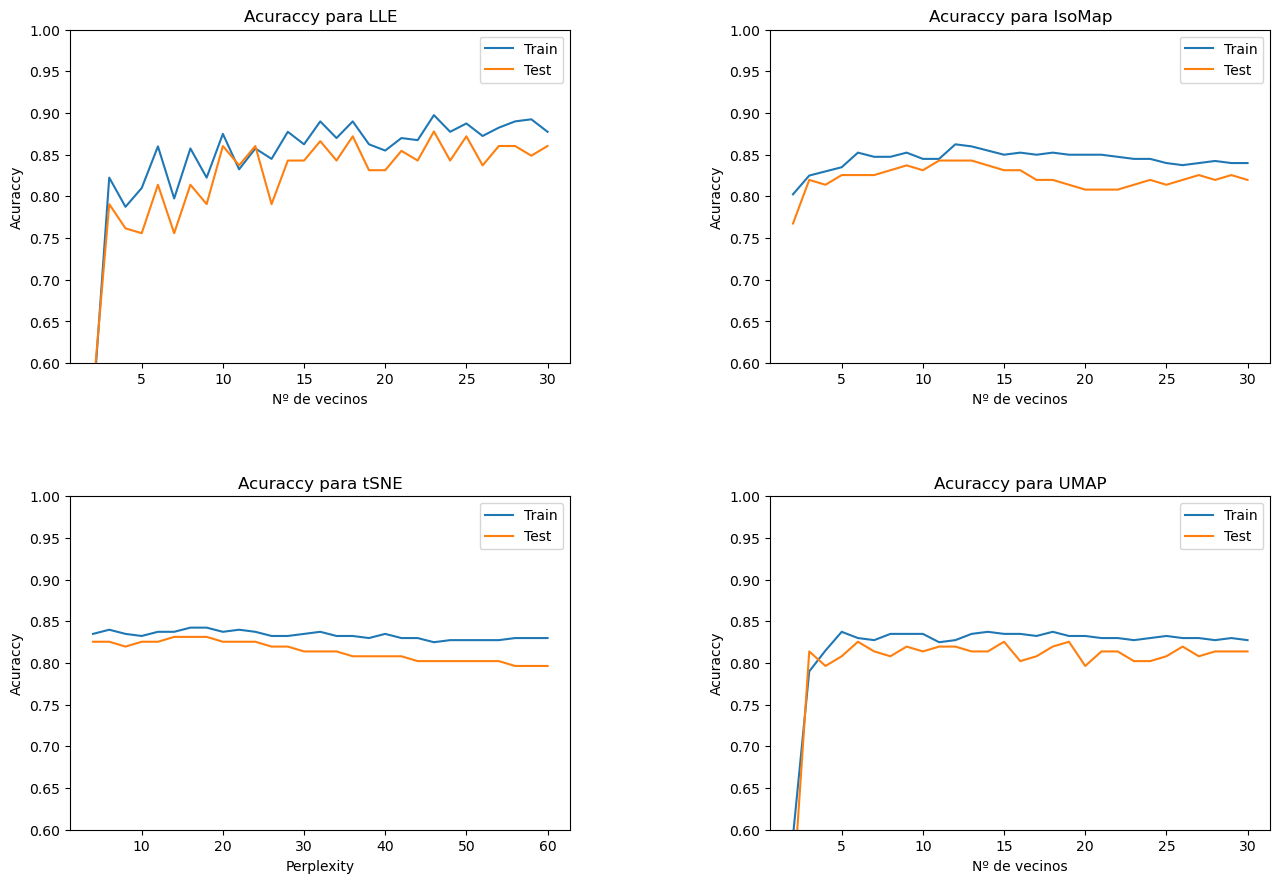

In [223]:
%matplotlib inline
p = [i * 2 for i in [*vecinos]]

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.subplot(221)
plt.plot(vecinos,lle_accuracy_train,label='Train')
plt.plot(vecinos,lle_accuracy_test,label='Test')
plt.ylim([.6,1])
plt.xlabel('Nº de vecinos')
plt.ylabel('Acuraccy')
plt.legend()
plt.title('Acuraccy para LLE')

plt.subplot(222)
plt.plot(vecinos,im_accuracy_train,label='Train')
plt.plot(vecinos,im_accuracy_test,label='Test')
plt.ylim([.6,1])
plt.xlabel('Nº de vecinos')
plt.ylabel('Acuraccy')
plt.legend()
plt.title('Acuraccy para IsoMap')


plt.subplot(223)
plt.plot(p,tsne_accuracy_train,label='Train')
plt.plot(p,tsne_accuracy_test,label='Test')
plt.xlabel('Perplexity')
plt.ylabel('Acuraccy')
plt.ylim([.6,1])
plt.legend()
plt.title('Acuraccy para tSNE')

plt.subplot(224)
plt.plot(vecinos,umap_accuracy_train,label='Train')
plt.plot(vecinos,umap_accuracy_test,label='Test')
plt.xlabel('Nº de vecinos')
plt.ylabel('Acuraccy')
plt.ylim([.6,1])
plt.legend()
plt.title('Acuraccy para UMAP')


plt.show()


En este caso, los resultados siguen un patrón similar al análisis con 3 clases. En LLE, la precisión comienza baja con 1 vecino, aumenta significativamente a 2 vecinos, y luego muestra un comportamiento poco fiable, pues la precisión sube y baja independientemente del número de vecinos, rondando el 82% de precisión, pero puediendo bajar al 79% en algunos casos.

En IsoMap, la precisión es más estable (alrededor del 85%), sin importar el número de vecinos. Se repite la observación de que la precisión en train es ligeramente superior a la de test.

En t-SNE, el resultado es consistente independientemente del valor de perplexity, con una precisión cercana al 85% para train y del 80% para test. Parece que aumentar perplexity emopeora el resultado.

En UMAP no tiene sentido considerar valores de vecinos menores de 5, pues la precisión es decepcionante. A partir de 7 vecinos se mantiente dentro de un intervalo estrecho (por encima del 80% a partir de entonces).

Queremos hacer notar que es considerablemente más dificil clasificar correctamente 9 clases que 3, y sin embargo, los resultados son en promedio solo un 10% peores. Hemos podido comprobar como si no usamos técnicas manifold, el SVC es incapaz de clasificar bien másdel 40% de las muestras. Estos métodos duplican la precisión.